# Problemas da Parte 4

Jeanlex Soares de Sousa (jeanlex@fisica.ufc.br) <br>
Departamento de Física <br>
Universidade Federal do Ceará

1 - Problema 3.4

2 - Problema 3.6 (Plotar o resultado analítico e o numérico nos casos descritos no problema)

3 - Problema 3.7

4 - Analise as Figuras 3.6, 3.7 e 3.8. Escreva um código para simular cada dos casos descritos na Figura, e reproduza-as. 

5 - Escreva um código para resolver o problema do pêndulo linear usando o método  de Runge-Kutta descrito no Apêndice A. O trabalho dfeve conter uma breve descrição do método.  

In [1]:
# Carregando bibliotecas numérica, gráfica e simbólica

import matplotlib.pyplot as plt
import scipy.integrate as spi
import numpy as np
import sympy as sp
sp.init_printing()

## Problema 3.4

Para o movimento harmônico simples, a forma geral da equação do movimento, para uma massa unitária (m = 1), é
$$ \dfrac{d^2x}{dt^2} =  - k x^{\alpha} $$

Tendo em vista que procuramos analisar o problema segundo a abordagem numérica, é conveniente reescrever esta formulação como duas equaões diferenciais de primeira ordem, uma vez que já temos subsidios matemáticos suficientes, pelo método de Euler-Cromer, para trata-lo. 

$$ \dfrac{dv}{dt} =  - k x^{\alpha} $$

$$ \dfrac{dx}{dt} =  v $$

Assim para cada passo de tempo $t_i$ calculamos v e x para o proximo tempo $t_{i+1}$.

$$ v_{i+1} = v_i - k x_i^{\alpha} \Delta t $$

$$ x_{i+1} = x_i + v_{i+1} \Delta t $$

### Análise do modelo para $\alpha$ = 1 

In [24]:
tf = 50
dt = 0.01
k = 1.0
alfa = 1.0

x_t = []
v_t = []
tempo1 = []
peri = []
period = []

for x in np.linspace(0.2, 1, 5):
    t = 0
    v_0 = 0
    eixo_x = [x]
    eixo_v = [v_0]
    temp = [t]
    per = []
    i = 0
    
    while t<=tf:
        eixov = eixo_v[i] - k*(eixo_x[i]**alfa)*dt             
        eixox = eixo_x[i] + eixov*dt 
        eixo_v.append(eixov)
        eixo_x.append(eixox)
        t = t+dt
        temp.append(t)
        i = i+1
        
    for i in range(1,len(eixo_x)):
            if abs(eixo_x[i] + x) < x*0.01:
                p = 2* temp[i]
                per.append(p)
                
    peri.append(per)
    tempo1.append(temp)
    x_t.append(eixo_x)
    v_t.append(eixo_v)
    
for i in range(len(peri)):
    a = peri[i][0]
    period.append(a)

Na formulaçao acima determinamos o periodo para cada ciclo calculado por meio do algoritmo

$for\ i\ in\ range(1,len(eixo_x)): $

$\ \ \ \ \ if\ abs(eixo_x[i] + x) < x*0.01:$
           
$\ \ \ \ \ p = 2*temp[i]$

onde para cada amplitude analisada, monta-se um vetor eixo_x contendo a descrição da posição com o tempo, sabendo que o periodo é definido quando o corpo passa novamente pelo mesmo ponto de referência, admitiremos este o ponto inicial ou amplitude analisada, como não podemos assegurar que o ponto calculado será o mesmo exato ponto, admitiremos a formulação: abs(eixo_x[i] + x) < x*0.01, logo quando este for verdade o experimento terá percorrido metade do ciclo, como o numero de passos é semelhante para a posição e o tempo, na posição i multiplicamos o tempo i por 2 e obteremos o valor aproximado para o periodo. Pelo algoritmo apresentado, p apresentará diversos valores ao longo do tempo, mas que terá propriedade de um progressão aritmética, como valor inicial e razão igual ao periodo.

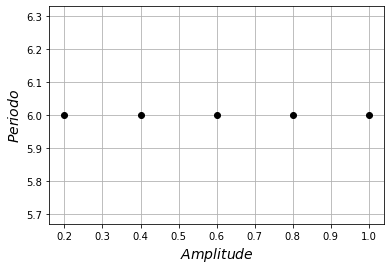

In [13]:
amplit = np.linspace(0.2, 1, 5)

plt.figure()

plt.plot(amplit,period,'ko')
plt.xlabel('$Amplitude$',fontsize = 14)
plt.ylabel('$Periodo$',fontsize = 14)
plt.grid()

plt.show()

### Análise da energia ($\alpha = 1$)

In [14]:
E_m = []
E_c = []
E_p = []

for i in range(len(x_t)):
    Em = []
    Ec = []
    Ep = []
    for j in range(len(x_t[i])):
        ec = (v_t[i][j]**2)/2
        ep = (x_t[i][j]**2)/2
        em = ec + ep
        Em.append(em)
        Ec.append(ec)
        Ep.append(ep)
    E_m.append(Em)
    E_c.append(Ec)
    E_p.append(Ep)

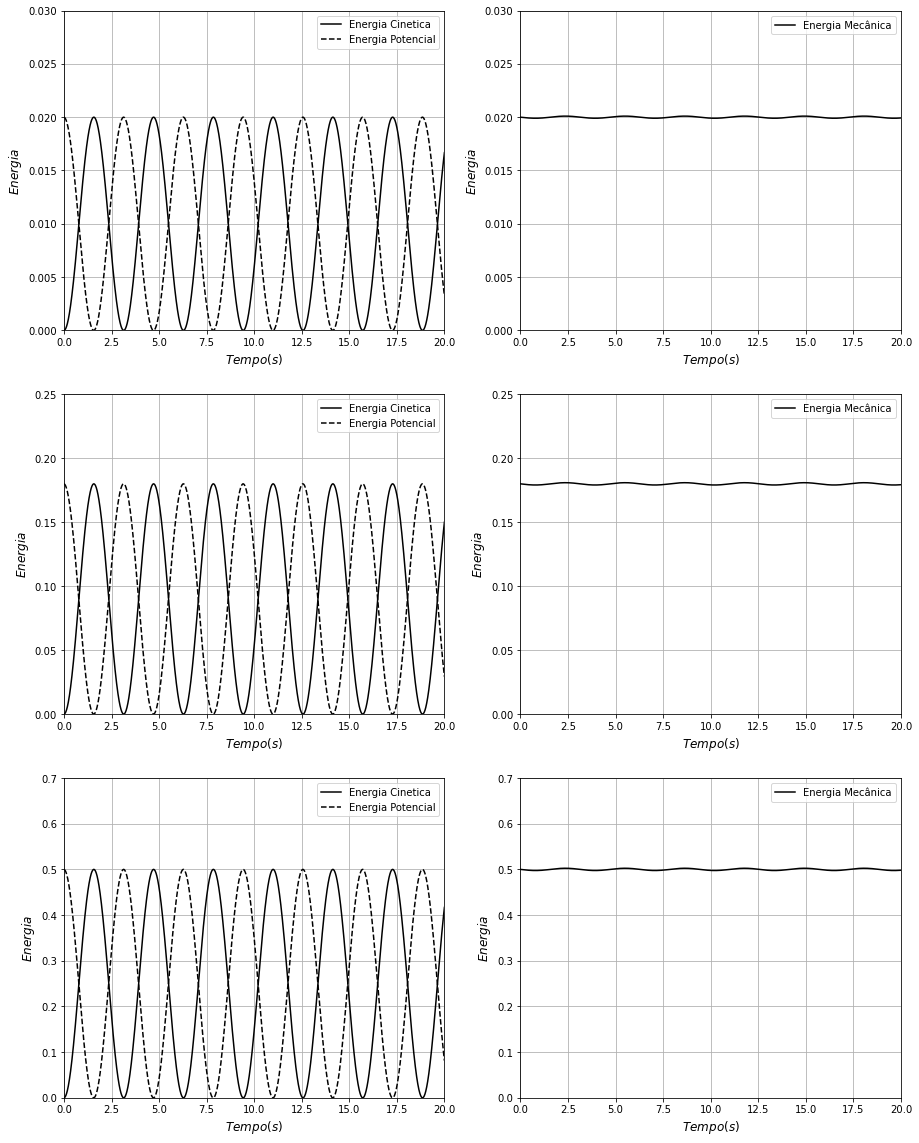

In [15]:
plt.figure(figsize=(15,20))

# ------------- Amplitude = 0.2 --------------------
plt.subplot(3,2,1)
plt.plot(tempo[0],E_c[0],'k-',label = 'Energia Cinetica')
plt.plot(tempo[0],E_p[0],'k--',label = 'Energia Potencial')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Energia$',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.xlim(0,20)
plt.ylim(0,0.03)
plt.grid()

plt.subplot(3,2,2)
plt.plot(tempo[0],E_m[0],'k-',label = 'Energia Mecânica')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Energia$',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.xlim(0,20)
plt.ylim(0,0.03)
plt.grid()

# ------------- Amplitude = 0.6 --------------------
plt.subplot(3,2,3)
plt.plot(tempo[2],E_c[2],'k-',label = 'Energia Cinetica')
plt.plot(tempo[2],E_p[2],'k--',label = 'Energia Potencial')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Energia$',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.xlim(0,20)
plt.ylim(0,0.25)
plt.grid()

plt.subplot(3,2,4)
plt.plot(tempo[2],E_m[2],'k-',label = 'Energia Mecânica')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Energia$',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.xlim(0,20)
plt.ylim(0,0.25)
plt.grid()

# ------------- Amplitude = 1.0 --------------------
plt.subplot(3,2,5)
plt.plot(tempo[4],E_c[4],'k-',label = 'Energia Cinetica')
plt.plot(tempo[4],E_p[4],'k--',label = 'Energia Potencial')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Energia$',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.xlim(0,20)
plt.ylim(0,0.7)
plt.grid()

plt.subplot(3,2,6)
plt.plot(tempo[4],E_m[4],'k-',label = 'Energia Mecânica')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Energia$',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.xlim(0,20)
plt.ylim(0,0.7)
plt.grid()


plt.show()

### Análise do movimento para $\alpha$ = 3

In [16]:
tf = 50
dt = 0.01
k = 1.0
alfaw = 3.0

x_tw = []
v_tw = []
tempow = []
periw = []
periodow = []

for x in np.linspace(0.2, 1, 5):
    t = 0
    v_0 = 0
    eixo_xw = [x]
    eixo_vw = [v_0]
    tempw = [t]
    perw = []
    i = 0
    
    while t<=tf:
        eixovw = eixo_vw[i] - k*(eixo_xw[i]**alfaw)*dt             
        eixoxw = eixo_xw[i] + eixovw*dt 
        eixo_vw.append(eixovw)
        eixo_xw.append(eixoxw)
        t = t+dt
        tempw.append(t)
        i = i+1
        
    for i in range(1,len(eixo_xw)):
            if abs(eixo_xw[i] + x) < x*0.01:
                p = 2*tempw[i]
                perw.append(p)
                
    periw.append(perw)
    tempow.append(tempw)
    x_tw.append(eixo_xw)
    v_tw.append(eixo_vw)
    
for i in range(len(periw)):
    a = periw[i][0]
    periodow.append(a)

Agora considerando $\alpha$ = 3, o comportamento do periodo como respeito ao tempo quando fazemos variar a amplitude, teremos

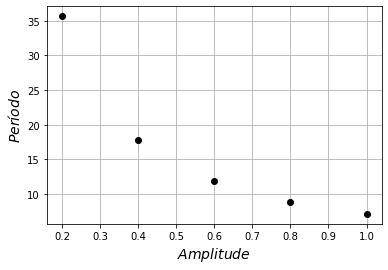

In [17]:
amplitw = np.linspace(0.2, 1, 5)

plt.figure()

plt.plot(amplitw,periodow,'ko')
plt.xlabel('$Amplitude$',fontsize = 14)
plt.ylabel('$Período$',fontsize = 14)
plt.grid()

plt.show()

comportamento que demostra que o periodo varia como a mudança da amplitude quando o coeficiente $\alpha$ da equação geral do movimento  é $\alpha$ > 1. Este modelo recebe a denominação de movimento anarmônico.

### Análise da energia

In [18]:
E_mw = []
E_cw = []
E_pw = []

for i in range(len(x_t)):
    Emw = []
    Ecw = []
    Epw = []
    for j in range(len(x_t[i])):
        ecw = (v_tw[i][j]**2)/2
        epw = (x_tw[i][j]**4)/4
        emw = ecw + epw
        Emw.append(emw)
        Ecw.append(ecw)
        Epw.append(epw)
    E_mw.append(Emw)
    E_cw.append(Ecw)
    E_pw.append(Epw)

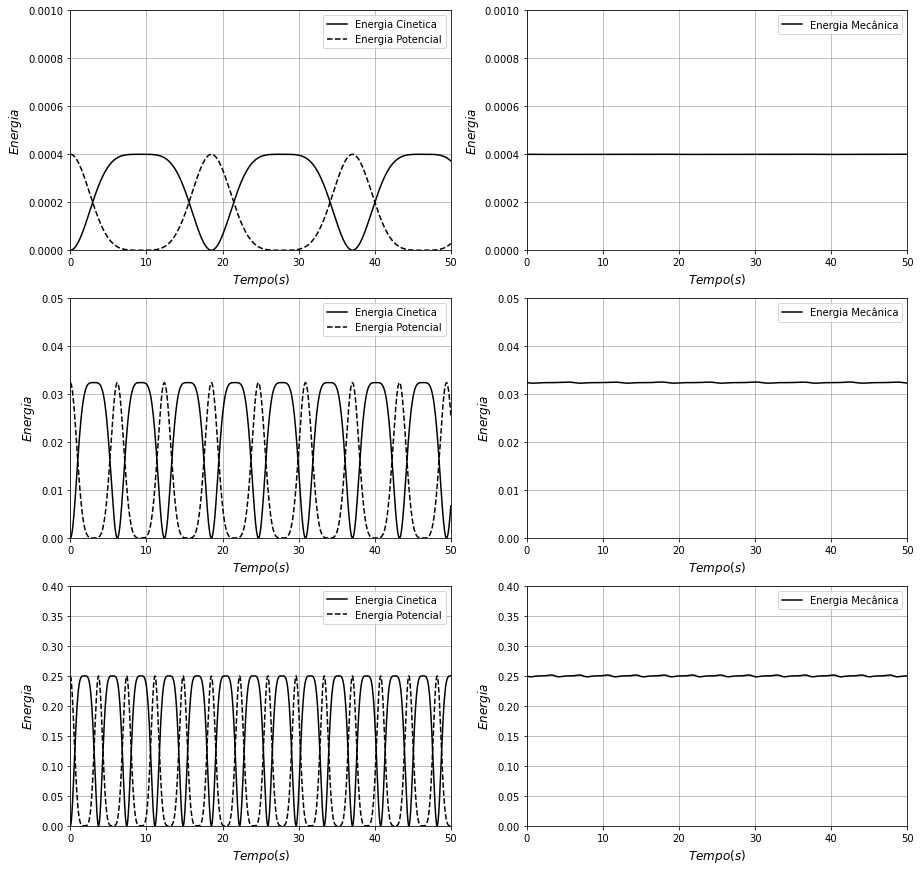

In [19]:
plt.figure(figsize=(15,15))

# ------------- Amplitude = 0.2 --------------------
plt.subplot(3,2,1)
plt.plot(tempow[0],E_cw[0],'k-',label = 'Energia Cinetica')
plt.plot(tempow[0],E_pw[0],'k--',label = 'Energia Potencial')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Energia$',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.xlim(0,50)
plt.ylim(0,0.001)
plt.grid()

plt.subplot(3,2,2)
plt.plot(tempow[0],E_mw[0],'k-',label = 'Energia Mecânica')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Energia$',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.xlim(0,50)
plt.ylim(0,0.001)
plt.grid()

# ------------- Amplitude = 0.6 --------------------
plt.subplot(3,2,3)
plt.plot(tempow[2],E_cw[2],'k-',label = 'Energia Cinetica')
plt.plot(tempow[2],E_pw[2],'k--',label = 'Energia Potencial')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Energia$',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.xlim(0,50)
plt.ylim(0,0.05)
plt.grid()

plt.subplot(3,2,4)
plt.plot(tempow[2],E_mw[2],'k-',label = 'Energia Mecânica')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Energia$',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.xlim(0,50)
plt.ylim(0,0.05)
plt.grid()

# ------------- Amplitude = 1.0 --------------------
plt.subplot(3,2,5)
plt.plot(tempow[4],E_cw[4],'k-',label = 'Energia Cinetica')
plt.plot(tempow[4],E_pw[4],'k--',label = 'Energia Potencial')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Energia$',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.xlim(0,50)
plt.ylim(0,0.4)
plt.grid()

plt.subplot(3,2,6)
plt.plot(tempow[4],E_mw[4],'k-',label = 'Energia Mecânica')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Energia$',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.xlim(0,50)
plt.ylim(0,0.4)
plt.grid()


plt.show()

Considerando uma discretização maior da variação da amplitude tornaremos a utilizar o intervalo de [0.2,1.0] para a amplitude, mas agora divideremos este em 200 partes.

In [21]:
tf = 300
dt = 0.01
k = 1.0
alfa = [1.0,3.0,5.0]

amplitude = []
periodo = []

for w in range(len(alfa)):
    amplit = []
    per = []
    for x in np.linspace(0.2, 1, 200):
        amplit.append(x)
        t = 0
        y_0 = 0
        eixo_x = [x]
        eixo_y = [y_0]
        tem = [t]
        i = 0
    
        while t<=tf:
            eixoy = eixo_y[i] - k*(eixo_x[i]**alfa[w])*dt             
            eixox = eixo_x[i] + eixoy*dt 
            eixo_y.append(eixoy)
            eixo_x.append(eixox)
            t = t+dt
            tem.append(t)
            i = i+1
            
        eix = -x
        for i in range(1,len(eixo_x)):
            if abs(eixo_x[i] - eix) < abs(eix)*0.01:
                tempo = tem[i] * 2
                break
        per.append(tempo)
    amplitude.append(amplit)
    periodo.append(per)

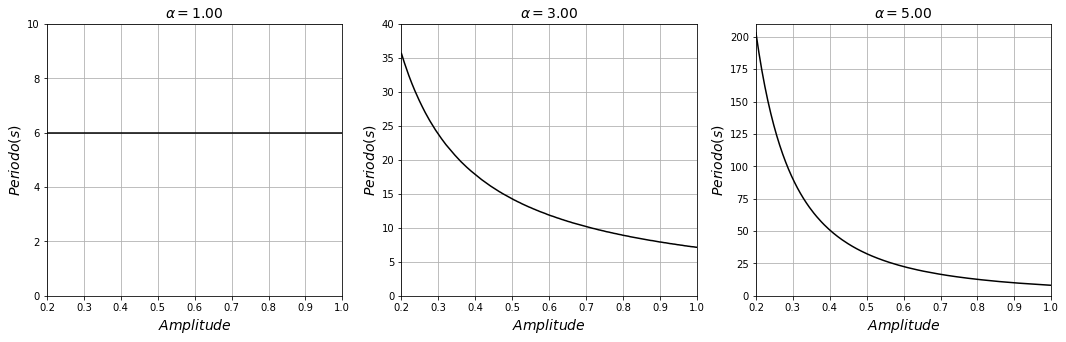

In [22]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.plot(amplitude[0],periodo[0],'k-')
plt.xlabel('$Amplitude$',fontsize = 14)
plt.ylabel('$Periodo (s)$',fontsize = 14)
plt.title(r'$\alpha = %.2f$'%alfa[0],fontsize = 14)
plt.xlim(0.2,1)
plt.ylim(0,10)
plt.grid()

plt.subplot(1,3,2)
plt.plot(amplitude[1],periodo[1],'k-')
plt.xlabel('$Amplitude$',fontsize = 14)
plt.ylabel('$Periodo (s)$',fontsize = 14)
plt.title(r'$\alpha = %.2f$'%alfa[1],fontsize = 14)
plt.xlim(0.2,1)
plt.ylim(0,40)
plt.grid()

plt.subplot(1,3,3)
plt.plot(amplitude[2],periodo[2],'k-')
plt.xlabel('$Amplitude$',fontsize = 14)
plt.ylabel('$Periodo (s)$',fontsize = 14)
plt.title(r'$\alpha = %.2f$'%alfa[2],fontsize = 14)
plt.xlim(0.2,1)
plt.ylim(0,210)
plt.grid()


plt.show()

### Comportamento do período do pêndulo não-linear devido a variação da amplitude de deslocamento (Problema 3.8)

$$ \dfrac{d^2\theta}{dt^2} =  - \dfrac{g}{l}\ sin(\theta)  $$

In [25]:
tf = 50
dt = 0.001
g = 9.81
l = 1.0
k = g/l

amplit = []
per = []
for x in np.linspace(0.1, 3, 500):
    amplit.append(x)
    t = 0
    y_0 = 0                  #omega (rad/s)
    eixo_x = [x]             #Theta (rad)
    eixo_y = [y_0]
    tem = [t]
    i = 0
    
    while t<=tf:
        eixoy = eixo_y[i] - k*(np.sin(eixo_x[i]))*dt             
        eixox = eixo_x[i] + eixoy*dt 
        eixo_y.append(eixoy)
        eixo_x.append(eixox)
        t = t+dt
        tem.append(t)
        i = i+1
            
    eix = -x
    for i in range(1,len(eixo_x)):
        if abs(eixo_x[i] - eix) < abs(eix)*0.01:
            tempo = tem[i] * 2
            break
    per.append(tempo)

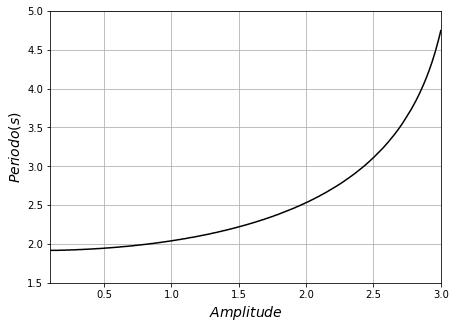

In [26]:
plt.figure(figsize=(7,5))

plt.plot(amplit,per,'k-')
plt.xlabel('$Amplitude$',fontsize = 14)
plt.ylabel('$Periodo (s)$',fontsize = 14)
plt.xlim(0.1,3)
plt.ylim(1.5,5)
plt.grid()

plt.show()

### Comparando os modelos

Movimento Harmônico 

$ \dfrac{d^2x}{dt^2} =  - k x $

Movimento Anarmônico

$ \dfrac{d^2x}{dt^2} =  - k x^{3} $


Como tratamos na modelagem do problema, admitimos a posição inicial no ponto máximo, a que denominamos por amplitude. Assim como não há perdas de energia do sistema, esta amplitude permanecerá a mesma ao longo de tudo o experiento, como podemos ver nos gráficos abaixo. Estes descrevem a variação da posição e da velocidade do corpo no tempo para amplitudes de 0.2, 0.6 e 1.0 u.c.

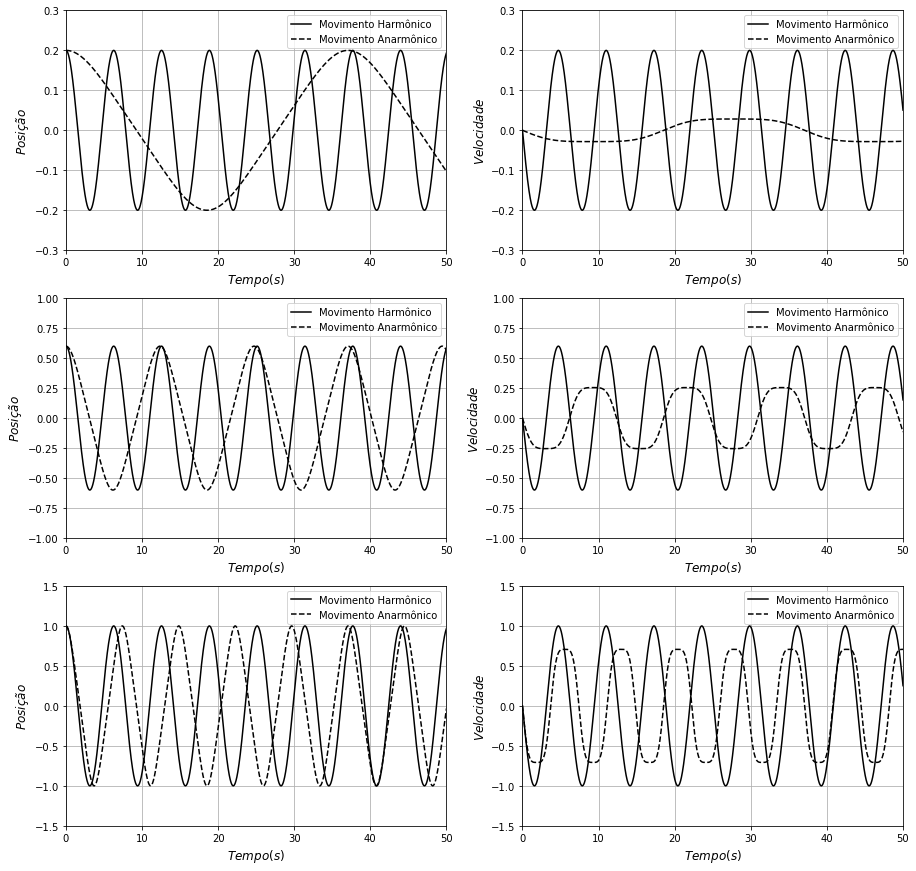

In [25]:
plt.figure(figsize=(15,15))

# ------------- Amplitude = 0.2 --------------------
plt.subplot(3,2,1)
plt.plot(tempo1[0],x_t[0],'k-',label = 'Movimento Harmônico')
plt.plot(tempow[0],x_tw[0],'k--',label = 'Movimento Anarmônico')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Posição$',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.ylim(-0.3,0.3)
plt.xlim(0,50)
plt.grid()

plt.subplot(3,2,2)
plt.plot(tempo1[0],v_t[0],'k-',label = 'Movimento Harmônico')
plt.plot(tempow[0],v_tw[0],'k--',label = 'Movimento Anarmônico')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Velocidade $',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.ylim(-0.3,0.3)
plt.xlim(0,50)
plt.grid()

# ------------- Amplitude = 0.6 --------------------
plt.subplot(3,2,3)
plt.plot(tempo1[2],x_t[2],'k-',label = 'Movimento Harmônico')
plt.plot(tempow[2],x_tw[2],'k--',label = 'Movimento Anarmônico')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Posição$',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.ylim(-1.0,1.0)
plt.xlim(0,50)
plt.grid()

plt.subplot(3,2,4)
plt.plot(tempo1[2],v_t[2],'k-',label = 'Movimento Harmônico')
plt.plot(tempow[2],v_tw[2],'k--',label = 'Movimento Anarmônico')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Velocidade $',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.ylim(-1.0,1.0)
plt.xlim(0,50)
plt.grid()

# ------------- Amplitude = 1.0 --------------------
plt.subplot(3,2,5)
plt.plot(tempo1[4],x_t[4],'k-',label = 'Movimento Harmônico')
plt.plot(tempow[4],x_tw[4],'k--',label = 'Movimento Anarmônico')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Posição$',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.ylim(-1.5,1.5)
plt.xlim(0,50)
plt.grid()

plt.subplot(3,2,6)
plt.plot(tempo1[4],v_t[4],'k-',label = 'Movimento Harmônico')
plt.plot(tempow[4],v_tw[4],'k--',label = 'Movimento Anarmônico')
plt.xlabel('$Tempo (s)$',fontsize = 12)
plt.ylabel('$Velocidade $',fontsize = 12)
plt.legend(loc = 1,prop={'size':10})
plt.ylim(-1.5,1.5)
plt.xlim(0,50)
plt.grid()

plt.show()

Por meio dos gráficos apresentados acima podemos intuitivamente argumenta: quanto menor a amplitude, maior será o periodo deste experimento, um vez que para os valores tratados de x (0.2 < x < 1.0) apresentarão suas potências resultados inferiores quanto menores estes forem. Assim a taxa de variação da velocidade do corpo será diretamente proporcional ao termo desta potência, o que resultará num movimento com velocidade cada vez menor demandando um tempo cada vez maior para este completar um ciclo. Isso significa que, em uma determinada posição, a aceleração restauradora no ponto de massa no oscilador anarmônico é menor do que o caso harmônico, tornando o período mais longo do que este último.

## Problema 3.6

Tornando o modelo do pêndulo simples um pouco mais realista, adicionaremos um fator de amortecimento a sua formulação. A maneira como o amortecimento entra na descrição do movimento depende de sua origem, rolamento efetivo na corda conectada ao suporte e a resistência do ar, são alguns dos exemplos desta fonte. Para simplificar esta abordagem admitiremos que esta força de amortecimento seja proporcional à velocidade. O que resultará em 

$$ \dfrac{d^2\theta}{dt^2} =  - \dfrac{g}{l}\theta - q \dfrac{d\theta}{dt}  $$

onde q é o parâmetro que mede a força de amortecimento e o sinal negativo garante que essa sempre se oponha ao movimento do pêndulo. Como esta equação diferencial é linear, nós podemos obter analiticamente as equações que descrever a variação de $\theta$ e $\omega$ em função do tempo. A solução geral desta equação diferencial será

$$ \theta(t) =   exp\left(\dfrac{-qt}{2}\right)\left[A_1\ exp\left(\sqrt{\dfrac{q^2}{4} - \Omega^2}\ t\right) + A_2\ exp\left(-\sqrt{\dfrac{q^2}{4} - \Omega^2}\ t\right) \right] $$

onde $\Omega = \sqrt{\dfrac{g}{l}}$, denominada de frequência natural.  

De modo simplificado este modelo comporta-se de três regimes distinto: Subamortecido, Criticamente amortecido e Superamortecido. Condicionado pela relação entre a frequência natural ($\Omega$) de oscilação e o valor de q. 

Subamortecido: $\Omega^2 > \dfrac{q^2}{4} \rightarrow \dfrac{g}{l} > \frac{q^2}{4} \rightarrow q^2 < \dfrac{4g}{l}   $ 

Críticamente amortecido: $\Omega^2 = \dfrac{q^2}{4} \rightarrow \dfrac{g}{l} = \dfrac{q^2}{4} \rightarrow q^2 = \dfrac{4g}{l}   $ 

Superamortecido: $\Omega^2 < \dfrac{q^2}{4} \rightarrow \dfrac{g}{l} < \dfrac{q^2}{4} \rightarrow q^2 > \dfrac{4g}{l}   $ 

Para cada um dos caso apresentado acima a equação geral será reescrita para atender as condições de contorno do modelo. Assim

#### I) Regime Subamortecido

$$ \theta(t) =   \theta_o\ exp \left(\dfrac{-qt}{2}\right) cos \left(\sqrt{\Omega^2 - \dfrac{q^2}{4}}\ t + \phi \right) $$

onde definimos $\Omega_1 = \sqrt{\Omega^2 - \dfrac{q^2}{4}}$, a frequência angular do oscilador amortecido para o regime subamortecido.

$$ \theta(t) =   \theta_o\ exp \left(\dfrac{-qt}{2} \right) cos (\ \Omega_1\ t + \phi) $$

$$ \omega(t) =  - \theta_o\ exp \left(\dfrac{-qt}{2} \right)\ \left[\Omega_1 \ sin (\ \Omega_1\ t + \phi) + \dfrac{q}{2} cos(\ \Omega_1\ t + \phi) \right] $$


#### II) Regime Criticamente amortecido

$$ \theta(t) =   (\theta_o\ + C\ t)\ exp \left(\dfrac{-qt}{2} \right) $$

$$ \omega(t) =  C\ exp \left(\dfrac{-qt}{2} \right) - \left[\left(\dfrac{q}{2}\right)(\theta_o\ + t) \right]\ exp \left(\dfrac{-qt}{2} \right) $$

para $\omega(0) = 0$ temos C = $\dfrac{q\theta_o}{2}$, assim

$$ \theta(t) =   \left(\theta_o\ + \dfrac{q\theta_o}{2}\ t\right)\ exp \left(\dfrac{-qt}{2} \right) $$

$$ \omega(t) =  \dfrac{q\theta_o}{2}\ exp \left(\dfrac{-qt}{2} \right) - \left[\left(\dfrac{q}{2}\right)(\theta_o\ + t) \right]\ exp \left(\dfrac{-qt}{2} \right) $$

#### III) Regime Superamortecido

$$ \theta(t) =  exp \left(\dfrac{-q}{2t}\right) \left[ A_1\ exp \left(\sqrt{\dfrac{q^2}{4} - \Omega^2}\ t\right) + A_2\ exp \left(- \sqrt{\dfrac{q^2}{4} - \Omega^2}\ t\right) \right] $$

$$ \omega(t) =  - \left(\dfrac{q}{2} \right) exp \left(\dfrac{-q}{2t}\right) \left[ A_1\ exp \left(\sqrt{\dfrac{q^2}{4} - \Omega^2}\ t\right) + A_2\ exp \left(- \sqrt{\dfrac{q^2}{4} - \Omega^2}\ t\right) \right] + exp \left(\dfrac{-q}{2t}\right) \left[ A_1 \left(\sqrt{\dfrac{q^2}{4} - \Omega^2} \right) \ exp \left(\sqrt{\dfrac{q^2}{4} - \Omega^2}\ t\right) - A_2\ \left(\sqrt{\dfrac{q^2}{4} - \Omega^2} \right) exp \left(- \sqrt{\dfrac{q^2}{4} - \Omega^2}\ t\right) \right]$$

onde definimos $\Omega_2 = \sqrt{\dfrac{q^2}{4} - \Omega^2}$, a frequência angular do oscilador amortecido para o regime superamortecido.

$$ \theta(t) =  exp \left(\dfrac{-q}{2t}\right) \left[ A_1\ exp \left(\Omega_2 t\right) + A_2\ exp \left(-\Omega_2\ t\right) \right] $$

$$ \omega(t) =  - \left(\dfrac{q}{2} \right) exp \left(\dfrac{-q}{2t}\right) \left[ A_1\ exp \left(\Omega_2 t\right) + A_2\ exp \left(- \Omega_2\ t\right) \right] + exp \left(\dfrac{-q}{2t}\right) \left[ A_1 \Omega_2 \ exp \left(\Omega_2\ t\right) - A_2\ \Omega_2 exp \left(- \Omega_2\ t\right) \right]$$

para $\theta(0) = \theta_o$ e $\omega(0) = 0$

$$ \theta(t) =  exp \left(\dfrac{-q}{2t}\right) \left[ \left(\dfrac{\theta_o}{2} \left(1 + \dfrac{q}{2 \Omega_2}  \right)  \right)\ exp \left(\Omega_2 t\right) + \left(\theta_o - \dfrac{\theta_o}{2} \left(1 + \dfrac{q}{2 \Omega_2}  \right)  \right)\ exp \left(-\Omega_2\ t\right) \right] $$


#### A energia total dos experimentos 

$$ E =  \dfrac{ml^2}{2} \left(\omega^2 + \dfrac{g}{l}\theta^2 \right)   $$

### Modelo analitico

#### I) Regime subamortecido

In [31]:
t0 = 0
tf = 15
dt = 0.01
theta0_grau = 10
theta0 = (np.pi*theta0_grau)/180
alfa = 0
g = 9.81
l = 1.0
m = 1.0
q1 = 1
omega = (g/l)**(1/2)
omega1 = (omega**2 - ((q1**2)/4))**(1/2)
t = np.arange(t0,tf,dt)

theta_t = theta0*np.exp(-q1*t/2)*np.cos(omega1*t+alfa)

#### II) Regime criticamente analítico

In [32]:
t0 = 0
tf = 15
dt = 0.01
theta0_grau = 10
theta0 = (np.pi*theta0_grau)/180
q2 = 6
t = np.arange(t0,tf,dt)
C = q2*theta0/2

theta_tt = (theta0 + C*t)*np.exp(-q2*t/2)

#### III) Regime superamortecido

In [33]:
t0 = 0
tf = 15
dt = 0.01
theta0_grau = 10
theta0 = (np.pi*theta0_grau)/180
g = 9.81
l = 1.0
m = 1.0
q3 = 10
omega = (g/l)**(1/2)
omega2 = (((q3**2)/4) - omega**2)**(1/2)
t = np.arange(t0,tf,dt)

theta_ttt = np.exp(-(q3/2)*t)*( ((theta0/2)*(1 + (q3/(2*omega2))))*np.exp(omega2*t) +  (theta0-((theta0/2)*(1 + (q3/(2*omega2)))))*np.exp(-omega2*t))

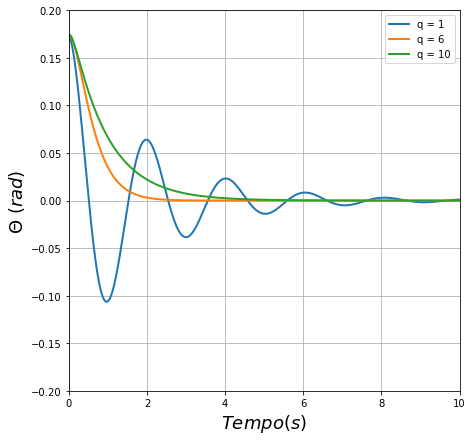

In [34]:
plt.figure(figsize=(7,7))

plt.plot(t,theta_t, label = "q = 1",linewidth = 2.0)
plt.plot(t,theta_tt, label = "q = 6",linewidth = 2.0)
plt.plot(t,theta_ttt, label = "q = 10",linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10})
plt.xlabel('$Tempo (s)$',fontsize = 18)
plt.ylabel('$\Theta\ (rad)$',fontsize = 18)
plt.xlim(0,10)
plt.ylim(-0.2,0.2)
plt.grid()

plt.show()

### Modelo Numérico

In [35]:
def metEulerCromerEnergOscAmort(t0,tf,dt,theta0_grau,omega_0,g,l,m,q):
    t = np.arange(t0,tf,dt)
    n = len(t)
    alfa = (np.pi*theta0_grau)/180
    energ = ((m*(l**2))/2)*((omega_0**2)+((g/l)*(alfa**2)))
    
    theta = [alfa]
    omega = [omega_0]
    energia = [energ]
    
    for i in range(0,n-1):              
        omeg = omega[i] - ((g/l)*theta[i] + q*omega[i])*dt             
        thet = theta[i] + omeg*dt 
        en = ((m*(l**2))/2)*((omeg**2)+((g/l)*(thet**2)))
        theta.append(thet)
        omega.append(omeg)
        energia.append(en)
        
    return theta,omega,energia

O modelo proposto para a oscilação amortecida admite oscilação tal que $sen(\theta) \approx \theta $. Assim consideraremos $\theta$ = 10°, modela-se o experimento para o q = 1, 3, 5, 7 e 9, procurando definir o comportamento dos seus respectivos movimentos caracterizando-os segundo os regimes apresentado anteriormente.

In [36]:
t0 = 0
tf = 20
dt = 0.01
theta0_grau = 10
omega_0 = 0
g = 9.81
l = 1.0
m = 1.0
q = [1,3,5,6,7,10]

t = np.arange(t0,tf,dt)

amplit = []
energy = []
omega = []

for j in range(len(q)):
    a,b,c = metEulerCromerEnergOscAmort(t0,tf,dt,theta0_grau,omega_0,g,l,m,q[j])
    energy.append(c)
    amplit.append(a)
    omega.append(b)

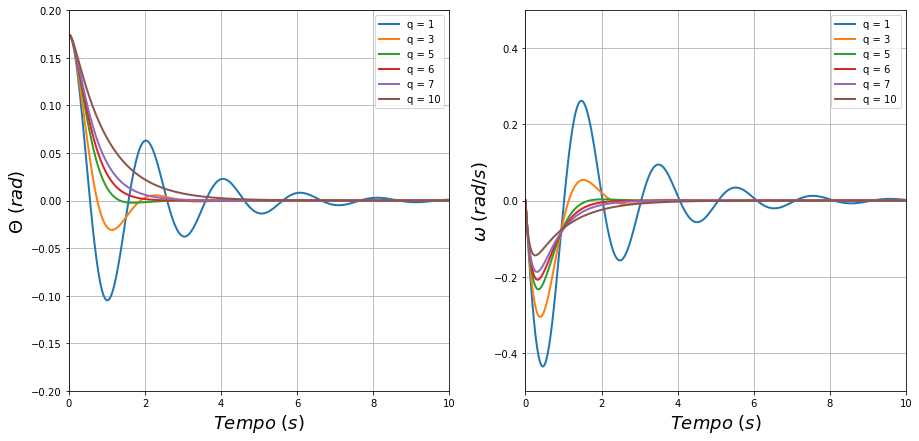

In [37]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(t,amplit[0], label = "q = %d"%q[0],linewidth = 2.0)
plt.plot(t,amplit[1], label = "q = %d"%q[1],linewidth = 2.0)
plt.plot(t,amplit[2], label = "q = %d"%q[2],linewidth = 2.0)
plt.plot(t,amplit[3], label = "q = %d"%q[3],linewidth = 2.0)
plt.plot(t,amplit[4], label = "q = %d"%q[4],linewidth = 2.0)
plt.plot(t,amplit[5], label = "q = %d"%q[5],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10})
plt.xlabel('$Tempo\ (s)$',fontsize = 18)
plt.ylabel('$\Theta\ (rad)$',fontsize = 18)
plt.xlim(t0,10)
plt.ylim(-0.2,0.2)
plt.grid()

plt.subplot(1,2,2)
plt.plot(t,omega[0], label = "q = %d"%q[0],linewidth = 2.0)
plt.plot(t,omega[1], label = "q = %d"%q[1],linewidth = 2.0)
plt.plot(t,omega[2], label = "q = %d"%q[2],linewidth = 2.0)
plt.plot(t,omega[3], label = "q = %d"%q[3],linewidth = 2.0)
plt.plot(t,omega[4], label = "q = %d"%q[4],linewidth = 2.0)
plt.plot(t,omega[5], label = "q = %d"%q[5],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10})
plt.xlabel('$Tempo\ (s)$',fontsize = 18)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 18)
plt.xlim(t0,10)
plt.ylim(-0.5,0.5)
plt.grid()

plt.show()

Para o movimento da particula condicionada ao regime subamortecido, apresentaremos um movimento oscilatório, onde os picos destas oscilações estarão a velocidade mínima (v = 0) e os valores nulos estarão a velocidade máxima, tendo estes parâmetros alterados a cada oscilação. 

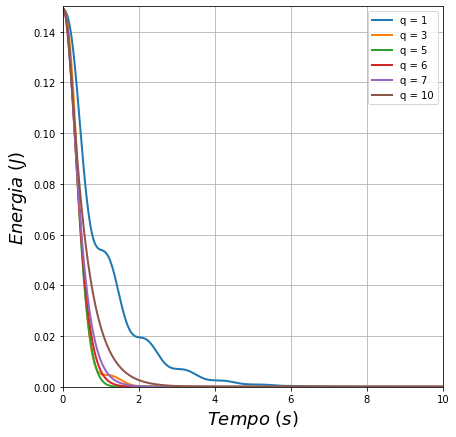

In [38]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(t,energy[0], label = "q = %d"%q[0],linewidth = 2.0)
plt.plot(t,energy[1], label = "q = %d"%q[1],linewidth = 2.0)
plt.plot(t,energy[2], label = "q = %d"%q[2],linewidth = 2.0)
plt.plot(t,energy[3], label = "q = %d"%q[3],linewidth = 2.0)
plt.plot(t,energy[4], label = "q = %d"%q[4],linewidth = 2.0)
plt.plot(t,energy[5], label = "q = %d"%q[5],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10})
plt.xlabel('$Tempo\ (s)$',fontsize = 18)
plt.ylabel('$Energia\ (J)$',fontsize = 18)
plt.xlim(t0,10)
plt.ylim(0,0.15)
plt.grid()
plt.show()

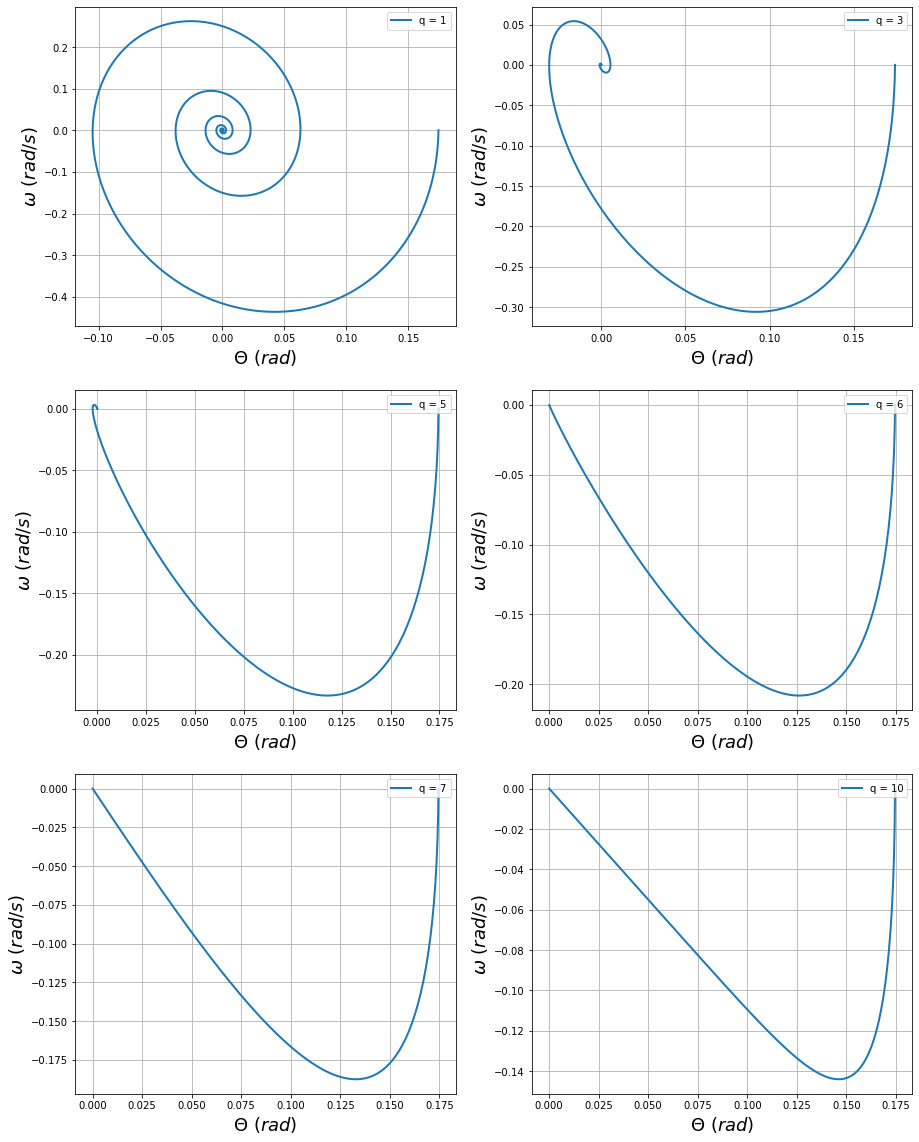

In [39]:
plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
plt.plot(amplit[0],omega[0], label = "q = %d"%q[0],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10})
plt.xlabel('$\Theta\ (rad)$',fontsize = 18)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 18)
plt.grid()

plt.subplot(3,2,2)
plt.plot(amplit[1],omega[1], label = "q = %d"%q[1],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10})
plt.xlabel('$\Theta\ (rad)$',fontsize = 18)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 18)
plt.grid()

plt.subplot(3,2,3)
plt.plot(amplit[2],omega[2], label = "q = %d"%q[2],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10})
plt.xlabel('$\Theta\ (rad)$',fontsize = 18)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 18)
plt.grid()

plt.subplot(3,2,4)
plt.plot(amplit[3],omega[3], label = "q = %d"%q[3],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10})
plt.xlabel('$\Theta\ (rad)$',fontsize = 18)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 18)
plt.grid()

plt.subplot(3,2,5)
plt.plot(amplit[4],omega[4], label = "q = %d"%q[4],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10})
plt.xlabel('$\Theta\ (rad)$',fontsize = 18)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 18)
plt.grid()

plt.subplot(3,2,6)
plt.plot(amplit[5],omega[5], label = "q = %d"%q[5],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10})
plt.xlabel('$\Theta\ (rad)$',fontsize = 18)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 18)
plt.grid()
plt.show()

Quando analisamos o gráfico de $\omega$ em função de $\theta$ podemos novamente notar a tendência oscilatória do modelo quando este apresenta-se no regime subamortecido, com a presença de velocidades positivas e negativas, demostrando que a partícula passou pelo ponto de equilíbrio e tenderá a retornar a este. Já para o regime crítico e superamortecido, a partícula realiza um movimento único que terá o meu momento de parada relacionado ao fator de amortecimento admitido.

#### Identificando os regimes

Para o modelo apresentado: m = 1, l = 1 e g = 9.81. Logo

Subamortecido: q < 6.26  
Críticamente amortecido: q = 6.26   
Superamortecido:  q > 6.26   

Para definirmos as delimitações destes regimes para o experimento, sem termos necessariamente utilizarmos estas informações acima, partiremos do princípio que o tempo de parada para o regime criticamente amortecido será o menor dentre os demais regimes. Assim pelo algoritmos 

$for\ r\ in\ range(len(a)):$

$\ \ \ \ if\ abs(a[r] - a[r-1]) < 1e-10:$

$\ \ \ \ \ \ \ \ rr = 1/t[r]$

$\ \ \ \ \ \ \ \ break$

percorreremos todo o vetor de $\theta(t)$ para cada valor de q análisado, definindo a diferença entre dois pontos consecutivos, quando esta for pequena o suficiente ($abs(a[r] - a[r-1]) < 1e-10$) consideraremos o momento de parada da particula neste regime. Com o tempo caracterizado, estabeleceremos o fator que é o inverso deste tempo, logo quando menor o tempo for para a sua devida parada maior será este fator. Assim tudo que esteve a esquerda do pico no gráfico estará no regime subamortecido e a direita no superamortecido.

In [43]:
t0 = 0
tf = 20
dt = 0.01
theta0_grau = 10
omega_0 = 0
g = 9.81
l = 1.0
m = 1.0
qw = np.linspace(1,10,10)

t = np.arange(t0,tf,dt)
tterm = []

for j in range(len(qw)):
    a,b,c = metEulerCromerEnergOscAmort(t0,tf,dt,theta0_grau,omega_0,g,l,m,qw[j])
    for r in range(len(a)):
        if abs(a[r] - a[r-1]) < 1e-8:
            rr = 1/t[r]
            break
    tterm.append(rr)

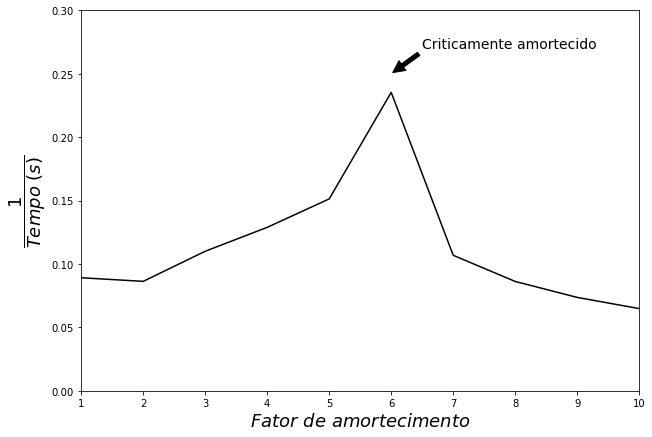

In [44]:
plt.figure(figsize=(10,7))

plt.plot(qw,tterm,'k-')
plt.xlabel('$Fator\ de\ amortecimento$',fontsize = 18)
plt.ylabel('$\dfrac{1}{Tempo\ (s)}$',fontsize = 18)
plt.annotate('Criticamente amortecido', xy=(6, 0.25), xytext=(6.5, 0.27),
            arrowprops=dict(facecolor='black', shrink=0.05),fontsize = 14)
plt.xlim(1,10)
plt.ylim(0,0.3)

plt.show()

Discretizando ainda mais o fator de amortecimento, analisaremos o seu comportamento para 900 modelos diferentes entre os valores de q no intervalo [1,10], variando em 0.01 para cada um destes modelos.

In [45]:
t0 = 0
tf = 20
dt = 0.01
theta0_grau = 10
omega_0 = 0
g = 9.81
l = 1.0
m = 1.0
qx = np.linspace(1,10,900)

t = np.arange(t0,tf,dt)
tterm = []

for j in range(len(qx)):
    a,b,c = metEulerCromerEnergOscAmort(t0,tf,dt,theta0_grau,omega_0,g,l,m,qx[j])
    for r in range(len(a)):
        if abs(a[r] - a[r-1]) < 1e-10:
            rr = 1/t[r]
            break
    tterm.append(rr)

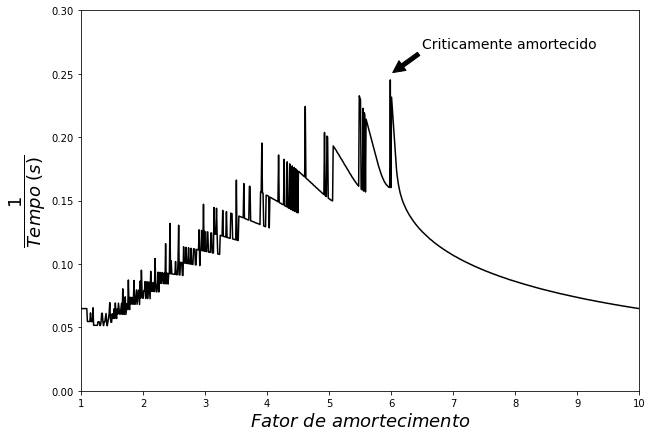

In [46]:
plt.figure(figsize=(10,7))

plt.plot(qx,tterm,'k-')
plt.xlabel('$Fator\ de\ amortecimento$',fontsize = 18)
plt.ylabel('$\dfrac{1}{Tempo\ (s)}$',fontsize = 18)
plt.annotate('Criticamente amortecido', xy=(6, 0.25), xytext=(6.5, 0.27),
            arrowprops=dict(facecolor='black', shrink=0.05),fontsize = 14)
plt.xlim(1,10)
plt.ylim(0,0.3)

plt.show()

## Problema 3.7

### Oscilador Forçado

$$ \dfrac{d^2\theta}{dt^2} =  - \dfrac{g}{l}\theta - q \dfrac{d\theta}{dt}  + F_D sin(\Omega t) $$

a solução analítica para o estado estacionário será

$$ \theta (t) =  \theta_o\ sin(\Omega_D t + \phi) $$

onde a amplitude $\theta_o$ é 

$$ \theta_o =  \dfrac{F_D}{\sqrt{(\Omega^2 + \Omega_D)^2 + (q\Omega_D)^2}} $$

In [52]:
def metEulerCromerOscAmortForc(t0,tf,dt,theta0_grau,omega_0,g,l,m,q,fd,ud):
    t = np.arange(t0,tf,dt)
    n = len(t)
    alfa = (np.pi*theta0_grau)/180
    energ = ((m*(l**2))/2)*((omega_0**2)+((g/l)*(alfa**2)))
    
    theta = [alfa]
    omega = [omega_0]
    energia = [energ]
    
    for i in range(0,n-1):              
        omeg = omega[i] - ((g/l)*theta[i] + q*omega[i] - fd*np.sin(ud*t[i]))*dt             
        thet = theta[i] + omeg*dt 
        en = ((m*(l**2))/2)*((omeg**2)+((g/l)*(thet**2)))
        theta.append(thet)
        omega.append(omeg)
        energia.append(en)
        
    return theta,omega,energia

In [48]:
t0 = 0
tf = 20
dt = 0.01
theta0_grau = 11.5
omega_0 = 0
g = 9.8
l = 1.0
m = 1.0
q = [0,0.5,1,3,5,7]
f = 0.2
u = 2

t = np.arange(t0,tf,dt)

amplit = []
omega =  []
energy = []

for j in range(len(q)):
    a,b,c = metEulerCromerOscAmortForc(t0,tf,dt,theta0_grau,omega_0,g,l,m,q[j],f,u)
    energy.append(c)
    amplit.append(a)
    omega.append(b)

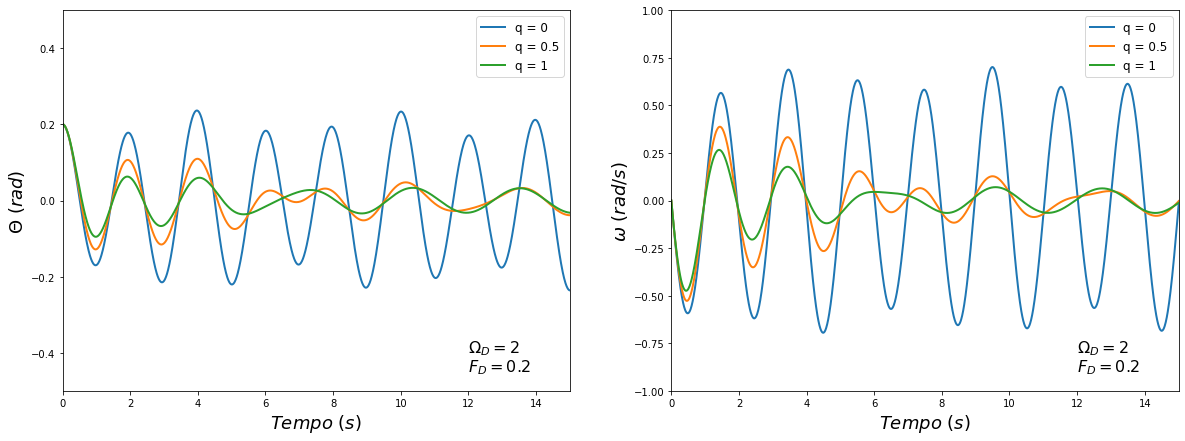

In [49]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(t,amplit[0], label = "q = %d"%q[0],linewidth = 2.0)
plt.plot(t,amplit[1], label = "q = %.1f"%q[1],linewidth = 2.0)
plt.plot(t,amplit[2], label = "q = %d"%q[2],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':12},ncol =1)
plt.xlabel('$Tempo\ (s)$',fontsize = 18)
plt.ylabel('$\Theta\ (rad)$',fontsize = 18)
plt.annotate('$\Omega_D = 2$', xy=(12, -0.4), xytext=(12, -0.4),fontsize = 16)
plt.annotate('$F_D = 0.2$', xy=(12, -0.45), xytext=(12, -0.45),fontsize = 16)
plt.xlim(t0,15)
plt.ylim(-0.5,0.5)

plt.subplot(1,2,2)
plt.plot(t,omega[0], label = "q = %d"%q[0],linewidth = 2.0)
plt.plot(t,omega[1], label = "q = %.1f"%q[1],linewidth = 2.0)
plt.plot(t,omega[2], label = "q = %d"%q[2],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':12},ncol = 1)
plt.xlabel('$Tempo\ (s)$',fontsize = 18)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 18)
plt.annotate('$\Omega_D = 2$', xy=(12, -0.8), xytext=(12, -0.8),fontsize = 16)
plt.annotate('$F_D = 0.2$', xy=(12, -0.9), xytext=(12, -0.9),fontsize = 16)
plt.xlim(t0,15)
plt.ylim(-1,1)

plt.show()

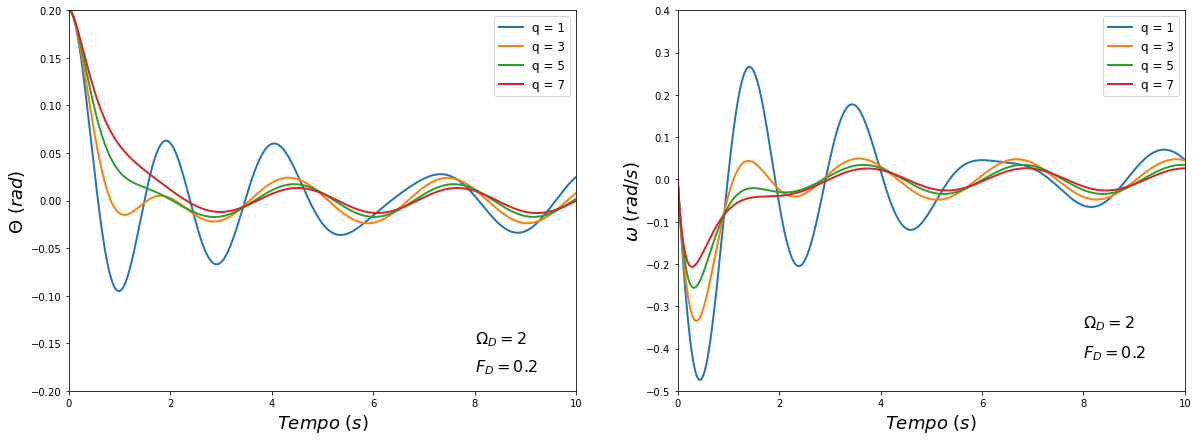

In [50]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(t,amplit[2], label = "q = %d"%q[2],linewidth = 2.0)
plt.plot(t,amplit[3], label = "q = %d"%q[3],linewidth = 2.0)
plt.plot(t,amplit[4], label = "q = %d"%q[4],linewidth = 2.0)
plt.plot(t,amplit[5], label = "q = %d"%q[5],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':12},ncol =1)
plt.xlabel('$Tempo\ (s)$',fontsize = 18)
plt.ylabel('$\Theta\ (rad)$',fontsize = 18)
plt.annotate('$\Omega_D = 2$', xy=(8, -0.15), xytext=(8, -0.15),fontsize = 16)
plt.annotate('$F_D = 0.2$', xy=(8, -0.18), xytext=(8, -0.18),fontsize = 16)
plt.xlim(t0,10)
plt.ylim(-0.2,0.2)


plt.subplot(1,2,2)
plt.plot(t,omega[2], label = "q = %d"%q[2],linewidth = 2.0)
plt.plot(t,omega[3], label = "q = %d"%q[3],linewidth = 2.0)
plt.plot(t,omega[4], label = "q = %d"%q[4],linewidth = 2.0)
plt.plot(t,omega[5], label = "q = %d"%q[5],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':12},ncol = 1)
plt.xlabel('$Tempo\ (s)$',fontsize = 18)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 18)
plt.annotate('$\Omega_D = 2$', xy=(8, -0.35), xytext=(8, -0.35),fontsize = 16)
plt.annotate('$F_D = 0.2$', xy=(8, -0.42), xytext=(8, -0.42),fontsize = 16)
plt.xlim(t0,10)
plt.ylim(-0.5,0.4)

plt.show()

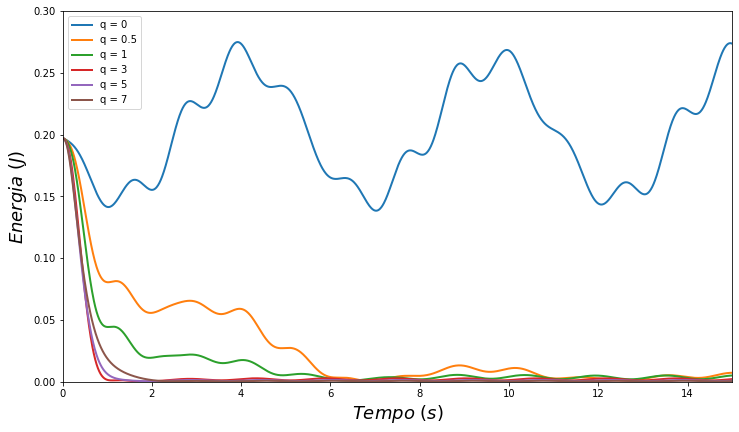

In [127]:
plt.figure(figsize=(12,15))
plt.subplot(2,1,2)
plt.plot(t,energy[0], label = "q = %d"%q[0],linewidth = 2.0)
plt.plot(t,energy[1], label = "q = %.1f"%q[1],linewidth = 2.0)
plt.plot(t,energy[2], label = "q = %d"%q[2],linewidth = 2.0)
plt.plot(t,energy[3], label = "q = %d"%q[3],linewidth = 2.0)
plt.plot(t,energy[4], label = "q = %d"%q[4],linewidth = 2.0)
plt.plot(t,energy[5], label = "q = %d"%q[5],linewidth = 2.0)
plt.legend(loc = 2,prop={'size':10},ncol = 1)
plt.xlabel('$Tempo\ (s)$',fontsize = 18)
plt.ylabel('$Energia\ (J)$',fontsize = 18)
plt.xlim(t0,15)
plt.ylim(0,0.3)

plt.show()

### Ressonância

In [54]:
def metEulerCromerForc(t0,tf,dt,theta0_grau,omega_0,g,l,q,f,u):
    t = np.arange(t0,tf,dt)
    n = len(t)
    alfa = (np.pi*theta0_grau)/180
    
    theta = [alfa]
    omega = [omega_0]
    
    for i in range(0,n-1):              
        omeg = omega[i] - ((g/l)*theta[i] + q*omega[i] - f*np.sin(u*t[i]))*dt             
        thet = theta[i] + omeg*dt 
        theta.append(thet)
        omega.append(omeg)
        
    return theta,omega

In [62]:
t0 = 0
tf = 20
dt = 0.01
theta0_grau = 11.5
omega_0 = 0
g = 9.81
l = 1.0
w_0 = np.sqrt(g/l)
fd = 0.2
qr = np.arange(0,2.2,0.2)
w_u = np.arange(1,6,1)
t = np.arange(t0,tf,dt)

thetanx = []

for j in range(len(qr)):
    thetanq = []
    for y in range(len(w_u)):
        th,om = metEulerCromerForc(t0,tf,dt,theta0_grau,omega_0,g,l,qr[j],fd,w_u[y])
        thetanq.append(th)
    thetanx.append(thetanq)

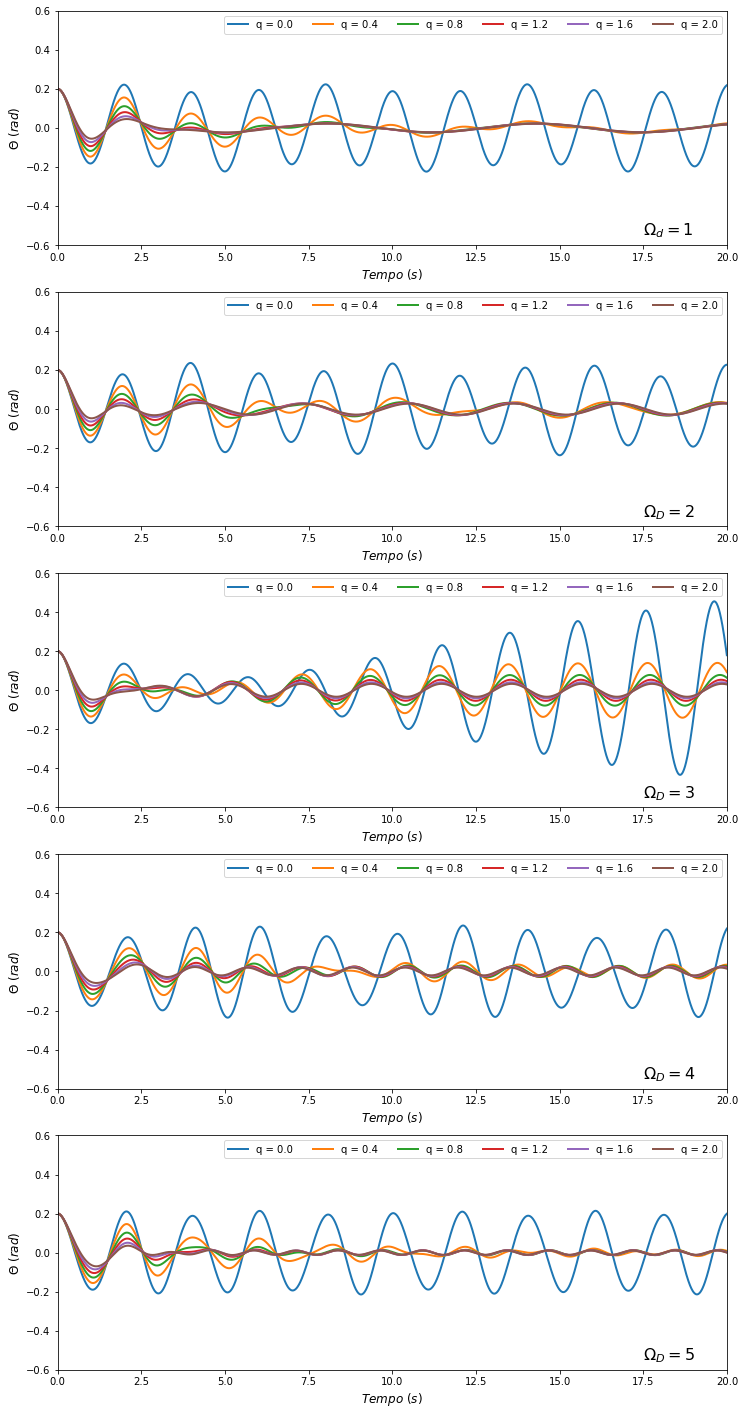

In [64]:
plt.figure(figsize=(12,25))

plt.subplot(5,1,1)
plt.plot(t,thetanx[0][0], label = "q = %.1f"%qr[0],linewidth = 2.0)
plt.plot(t,thetanx[2][0], label = "q = %.1f"%qr[2],linewidth = 2.0)
plt.plot(t,thetanx[4][0], label = "q = %.1f"%qr[4],linewidth = 2.0)
plt.plot(t,thetanx[6][0], label = "q = %.1f"%qr[6],linewidth = 2.0)
plt.plot(t,thetanx[8][0], label = "q = %.1f"%qr[8],linewidth = 2.0)
plt.plot(t,thetanx[10][0], label = "q = %.1f"%qr[10],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10},ncol = 6)
plt.ylabel(r'$\Theta\ (rad)$',fontsize = 12)
plt.xlabel('$Tempo\ (s)$',fontsize = 12)
plt.annotate('$\Omega_d = 1$', xy=(17.5, -0.55), xytext=(17.5, -0.55),fontsize = 16)
plt.xlim(0,20)
plt.ylim(-0.6,0.6)

plt.subplot(5,1,2)
plt.plot(t,thetanx[0][1], label = "q = %.1f"%qr[0],linewidth = 2.0)
plt.plot(t,thetanx[2][1], label = "q = %.1f"%qr[2],linewidth = 2.0)
plt.plot(t,thetanx[4][1], label = "q = %.1f"%qr[4],linewidth = 2.0)
plt.plot(t,thetanx[6][1], label = "q = %.1f"%qr[6],linewidth = 2.0)
plt.plot(t,thetanx[8][1], label = "q = %.1f"%qr[8],linewidth = 2.0)
plt.plot(t,thetanx[10][1], label = "q = %.1f"%qr[10],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10},ncol = 6)
plt.ylabel(r'$\Theta\ (rad)$',fontsize = 12)
plt.xlabel('$Tempo\ (s)$',fontsize = 12)
plt.annotate('$\Omega_D = 2$', xy=(17.5, -0.55), xytext=(17.5, -0.55),fontsize = 16)
plt.xlim(0,20)
plt.ylim(-0.6,0.6)

plt.subplot(5,1,3)
plt.plot(t,thetanx[0][2], label = "q = %.1f"%qr[0],linewidth = 2.0)
plt.plot(t,thetanx[2][2], label = "q = %.1f"%qr[2],linewidth = 2.0)
plt.plot(t,thetanx[4][2], label = "q = %.1f"%qr[4],linewidth = 2.0)
plt.plot(t,thetanx[6][2], label = "q = %.1f"%qr[6],linewidth = 2.0)
plt.plot(t,thetanx[8][2], label = "q = %.1f"%qr[8],linewidth = 2.0)
plt.plot(t,thetanx[10][2], label = "q = %.1f"%qr[10],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10},ncol = 6)
plt.ylabel(r'$\Theta\ (rad)$',fontsize = 12)
plt.xlabel('$Tempo\ (s)$',fontsize = 12)
plt.annotate('$\Omega_D = 3$', xy=(17.5, -0.55), xytext=(17.5, -0.55),fontsize = 16)
plt.xlim(0,20)
plt.ylim(-0.6,0.6)

plt.subplot(5,1,4)
plt.plot(t,thetanx[0][3], label = "q = %.1f"%qr[0],linewidth = 2.0)
plt.plot(t,thetanx[2][3], label = "q = %.1f"%qr[2],linewidth = 2.0)
plt.plot(t,thetanx[4][3], label = "q = %.1f"%qr[4],linewidth = 2.0)
plt.plot(t,thetanx[6][3], label = "q = %.1f"%qr[6],linewidth = 2.0)
plt.plot(t,thetanx[8][3], label = "q = %.1f"%qr[8],linewidth = 2.0)
plt.plot(t,thetanx[10][3], label = "q = %.1f"%qr[10],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10},ncol = 6)
plt.ylabel(r'$\Theta\ (rad)$',fontsize = 12)
plt.xlabel('$Tempo\ (s)$',fontsize = 12)
plt.annotate('$\Omega_D = 4$', xy=(17.5, -0.55), xytext=(17.5, -0.55),fontsize = 16)
plt.xlim(0,20)
plt.ylim(-0.6,0.6)

plt.subplot(5,1,5)
plt.plot(t,thetanx[0][4], label = "q = %.1f"%qr[0],linewidth = 2.0)
plt.plot(t,thetanx[2][4], label = "q = %.1f"%qr[2],linewidth = 2.0)
plt.plot(t,thetanx[4][4], label = "q = %.1f"%qr[4],linewidth = 2.0)
plt.plot(t,thetanx[6][4], label = "q = %.1f"%qr[6],linewidth = 2.0)
plt.plot(t,thetanx[8][4], label = "q = %.1f"%qr[8],linewidth = 2.0)
plt.plot(t,thetanx[10][4], label = "q = %.1f"%qr[10],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10},ncol = 6)
plt.ylabel(r'$\Theta\ (rad)$',fontsize = 12)
plt.xlabel('$Tempo\ (s)$',fontsize = 12)
plt.annotate('$\Omega_D = 5$', xy=(17.5, -0.55), xytext=(17.5, -0.55),fontsize = 16)
plt.xlim(0,20)
plt.ylim(-0.6,0.6)

plt.show()

Por meio dos gráficos acima descrevemos o comportamento de uma partícula colocada a realizar uma oscilação forçada, cuja amplitude é $F_D = 0.2$ e com frequência angular $\Omega_D$ variando para cada experimento em uma unidade, assim teremos o modelo para $\Omega_D$ = 1, 2, 3, 4 e 5. Sabendo que está frequência distinguir-se da frequência natural do oscilador livre, $\Omega$, procuramos encontrar a frequência $\Omega_D$ mais proxima de $\Omega$, pois nesta circunstância estaremos diante do fenômeno da ressonância, caracterizada pelo aumento abrupto da amplitude de sua oscilação. Logo como $\Omega = \sqrt{g/l}$, para l = 1 e g = 9.81, $\Omega \approx 3.13$, o que podemos observa no gráfico onde $\Omega_D = 3$, um aumento abrupto na amplitude de oscilação, tendo sido mais visível para os modelos cujo os coeficientes de amortecimento são pequenos ou nulos. Podemos notar no gráfico em questão que o fenômeno da ressônancia só torna-se aparente após a "passagem de uma zona instável" da oscilação e alcança o estado estacionário, esta informação será útil quando elaboraremos o algoritmo para descrever a relação entre a amplitude e a razão $\Omega_D/\Omega$, para o modelo numérico, onde partirmos da metade do expeimento em diante. O modelo analítico não necessita desta intervenção, pois a esquação definida já apresenta-se o estado estácionário.

#### Modelo Analítico

Por meio do levantamente anterior, podemos concluir que para pequenos coeficientes de amortecimento (q) o fenômeno da ressonãncia torna-se mais aparente, assim trabalharemos com um conjunto de valores para q no intervalo [0.1,1.0], variando entre seus elementos com o termo de 0.1. Como o objetivo é definirmos a razão $\Omega_D/\Omega$ mais próxima do valor unitário possivel, analisaremos um conjunto de valores para $\Omega_D$ no intervalo [1.0,5.0], variando seus elementos com termo de 0.01. 

In [140]:
t0 = 0
tf = 20
dt = 0.01
g = 9.81
l = 1.0
w_0 = np.sqrt(g/l)
q = np.arange(0,1.1,0.1)
fd = 0.5
w_u = np.arange(1,5,0.01)
t = np.arange(t0,tf,dt)
phi = 0

theta = []
amplitude = []
for j in range(len(q)):
    thetaq = []
    amplitq = []
    for y in range(len(w_u)):
        thetaw = []
        for i in range(len(t)):
            aux = fd/(np.sqrt((((w_0**2)-(w_u[y]**2))**2) + ((q[j]*w_u[y])**2)))
            th = aux*np.sin(w_u[y]*t[i] + phi)
            thetaw.append(th)
        a = max(thetaw)
        amplitq.append(a)
        thetaq.append(thetaw)
    theta.append(thetaq)
    amplitude.append(amplitq)

ress = []
for r in range(len(w_u)):
    razao = w_u[r]/w_0
    ress.append(razao)

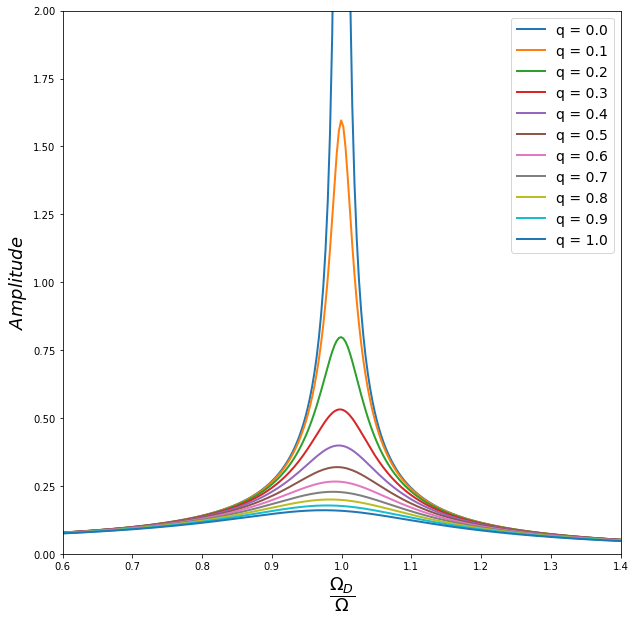

In [141]:
plt.figure(figsize=(10,10))

plt.plot(ress,amplitude[0], label = "q = %.1f"%q[0],linewidth = 2.0)
plt.plot(ress,amplitude[1], label = "q = %.1f"%q[1],linewidth = 2.0)
plt.plot(ress,amplitude[2], label = "q = %.1f"%q[2],linewidth = 2.0)
plt.plot(ress,amplitude[3], label = "q = %.1f"%q[3],linewidth = 2.0)
plt.plot(ress,amplitude[4], label = "q = %.1f"%q[4],linewidth = 2.0)
plt.plot(ress,amplitude[5], label = "q = %.1f"%q[5],linewidth = 2.0)
plt.plot(ress,amplitude[6], label = "q = %.1f"%q[6],linewidth = 2.0)
plt.plot(ress,amplitude[7], label = "q = %.1f"%q[7],linewidth = 2.0)
plt.plot(ress,amplitude[8], label = "q = %.1f"%q[8],linewidth = 2.0)
plt.plot(ress,amplitude[9], label = "q = %.1f"%q[9],linewidth = 2.0)
plt.plot(ress,amplitude[10], label = "q = %.1f"%q[10],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':14})
plt.xlabel(r'$\dfrac{\Omega_D}{\Omega}$',fontsize = 18)
plt.ylabel('$Amplitude$',fontsize = 18)
plt.xlim(0.6,1.4)
plt.ylim(0,2)

plt.show()

#### Modelo numérico

In [148]:
t0 = 0
tf = 20
dt = 0.01
theta0_grau = 0
omega_0 = 0
g = 9.81
l = 1.0
w_0 = np.sqrt(g/l)
fd = 0.5
qr = np.arange(0,1.1,0.1)
w_u = np.arange(1,5,0.01)
t = np.arange(t0,tf,dt)

thetan = []
amplituden = []

for j in range(len(qr)):
    thetanq = []
    amplitnq = []
    for y in range(len(w_u)):
        th,om = metEulerCromerForc(t0,tf,dt,theta0_grau,omega_0,g,l,qr[j],fd,w_u[y])
        a = max(th[1000:2000])
        amplitnq.append(a)
        thetanq.append(th)
    thetan.append(thetanq)
    amplituden.append(amplitnq)

ressn = []
for r in range(len(w_u)):
    razaon = w_u[r]/w_0
    ressn.append(razaon)

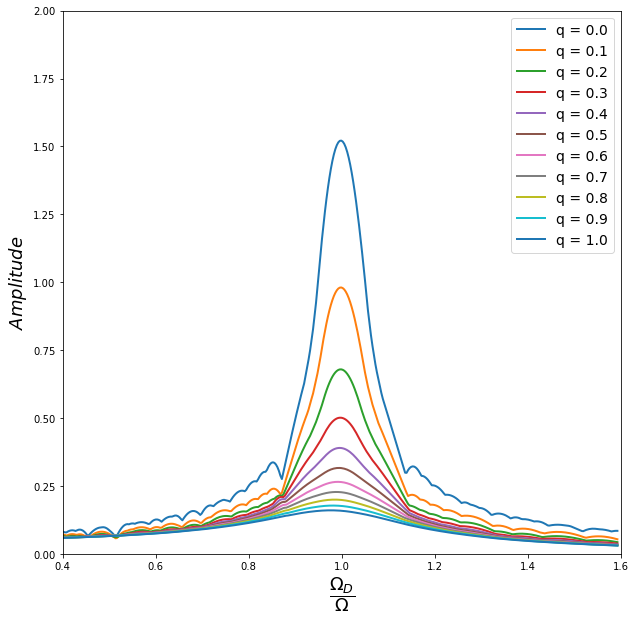

In [150]:
plt.figure(figsize=(10,10))

plt.plot(ressn,amplituden[0], label = "q = %.1f"%qr[0],linewidth = 2.0)
plt.plot(ressn,amplituden[1], label = "q = %.1f"%qr[1],linewidth = 2.0)
plt.plot(ressn,amplituden[2], label = "q = %.1f"%qr[2],linewidth = 2.0)
plt.plot(ressn,amplituden[3], label = "q = %.1f"%qr[3],linewidth = 2.0)
plt.plot(ressn,amplituden[4], label = "q = %.1f"%qr[4],linewidth = 2.0)
plt.plot(ressn,amplituden[5], label = "q = %.1f"%qr[5],linewidth = 2.0)
plt.plot(ressn,amplituden[6], label = "q = %.1f"%qr[6],linewidth = 2.0)
plt.plot(ressn,amplituden[7], label = "q = %.1f"%qr[7],linewidth = 2.0)
plt.plot(ressn,amplituden[8], label = "q = %.1f"%qr[8],linewidth = 2.0)
plt.plot(ressn,amplituden[9], label = "q = %.1f"%qr[9],linewidth = 2.0)
plt.plot(ressn,amplituden[10], label = "q = %.1f"%qr[10],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':14})
plt.xlabel(r'$\dfrac{\Omega_D}{\Omega}$',fontsize = 18)
plt.ylabel('$Amplitude$',fontsize = 18)
plt.xlim(0.4,1.6)
plt.ylim(0,2)

plt.show()

## Caos no movimento do pêndulo não-linear (Pêndulo físico)

$$ \dfrac{d^2\theta}{dt^2} =  - \dfrac{g}{l}\ sin\ \theta - q \dfrac{d\theta}{dt} + F_D\ sin(\Omega_D\ t)  $$

Para o método numérico, admitiremos duas equações diferenciais de primeira ordem:

$$ \dfrac{d\omega}{dt} =  - \dfrac{g}{l}\ sin\ \theta - q \dfrac{d\theta}{dt} + F_D\ sin(\Omega_D\ t)  $$

$$ \dfrac{d\theta}{dt} =  \omega $$

Análise da função horária de $\theta$ no tempo SEM a restrição do intervalo $[-\pi,\pi]$

In [69]:
def wmetEulerCromerPendFisicow(t0,tf,dt,theta0_grau,omega_0,g,l,q,ud,fd):
    t = np.arange(t0,tf,dt)
    n = len(t)
    alfa = (np.pi*theta0_grau)/180
    
    theta = [alfa]
    omega = [omega_0]
    
    for i in range(0,n-1):              
        omeg = omega[i] - ((g/l)*np.sin(theta[i]) + q*omega[i] - fd*np.sin(ud*t[i]))*dt      
        thet = theta[i] + omeg*dt 
        omega.append(omeg)
        theta.append(thet)
        
    return theta,omega,t

In [71]:
t0 = 0
tf = 60
dt = 0.04
theta0_grau = 11.5
omega_0 = 0
g = 9.81
l = 9.81
q = 1/2
fdx = [0.0,0.5,1.2]
ud = 2/3

wthetafor = []
womegafor = []
wtempofor = []

for i in range(len(fdx)):
    the,ome,t = wmetEulerCromerPendFisicow(t0,tf,dt,theta0_grau,omega_0,g,l,q,ud,fdx[i])
    wthetafor.append(the)
    womegafor.append(ome)
    wtempofor.append(t)

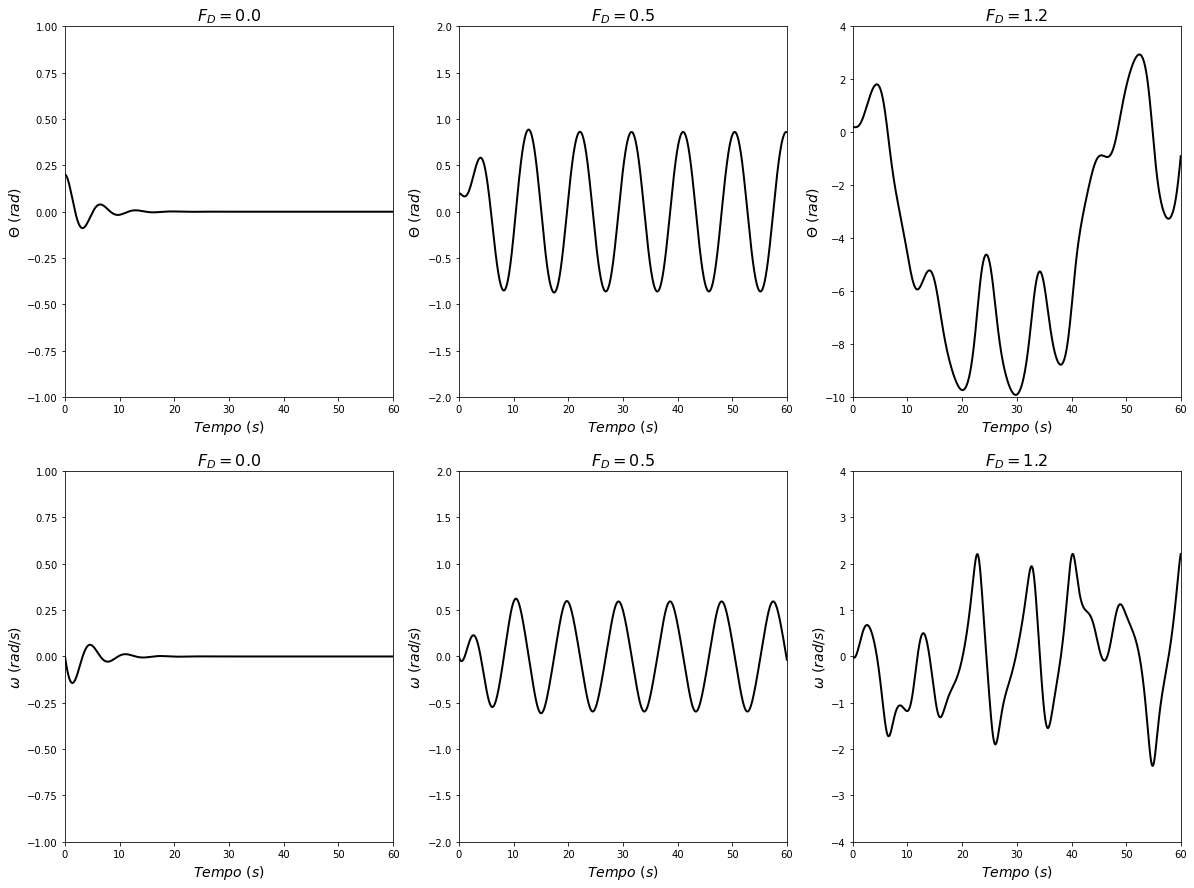

In [73]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
plt.plot(wtempofor[0],wthetafor[0],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.title(r'$F_D = %.1f$'%fdx[0],fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-1,1)

plt.subplot(2,3,2)
plt.plot(wtempofor[1],wthetafor[1],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.title(r'$F_D = %.1f$'%fdx[1],fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-2,2)

plt.subplot(2,3,3)
plt.plot(wtempofor[2],wthetafor[2],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.title(r'$F_D = %.1f$'%fdx[2],fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-10,4)

plt.subplot(2,3,4)
plt.plot(wtempofor[0],womegafor[0],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.title(r'$F_D = %.1f$'%fdx[0],fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-1,1)

plt.subplot(2,3,5)
plt.plot(wtempofor[1],womegafor[1],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.title(r'$F_D = %.1f$'%fdx[1],fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-2,2)

plt.subplot(2,3,6)
plt.plot(wtempofor[2],womegafor[2],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.title(r'$F_D = %.1f$'%fdx[2],fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-4,4)

plt.show()

Análise da função horária de $\theta$ no tempo COM a restrição do intervalo $[-\pi,\pi]$

In [97]:
def metEulerCromerPendFisico(t0,tf,dt,theta0_grau,omega_0,g,l,q,ud,fd):
    t = np.arange(t0,tf,dt)
    n = len(t)
    alfa = (np.pi*theta0_grau)/180
    ene = ((m*(l**2))/2)*((omega_0**2)+((g/l)*(alfa**2)))
    
    theta = [alfa]
    omega = [omega_0]
    energ = [ene]
    
    for i in range(0,n-1):              
        omeg = omega[i] - ((g/l)*np.sin(theta[i]) + q*omega[i] - fd*np.sin(ud*t[i]))*dt      
        thet = theta[i] + omeg*dt 
        if thet > np.pi:
            thet = thet - 2*np.pi
        if thet < -np.pi:
            thet = thet + 2*np.pi
        en = (((l**2))/2)*((omeg**2)+((g/l)*(thet**2)))
        omega.append(omeg)
        theta.append(thet)
        energ.append(en)
        
    return theta,omega,t,energ

In [114]:
t0 = 0
tf = 60
dt = 0.04
theta0_grau = 11.5
omega_0 = 0
g = 9.81
l = 9.81
q = 1/2
fd = [0.0,0.5,1.2]
ud = 2/3

thetafor = []
omegafor = []
tempofor = []
energfor = []

for i in range(len(fd)):
    the,ome,t,ener = metEulerCromerPendFisico(t0,tf,dt,theta0_grau,omega_0,g,l,q,ud,fd[i])
    thetafor.append(the)
    omegafor.append(ome)
    tempofor.append(t)
    energfor.append(ener)

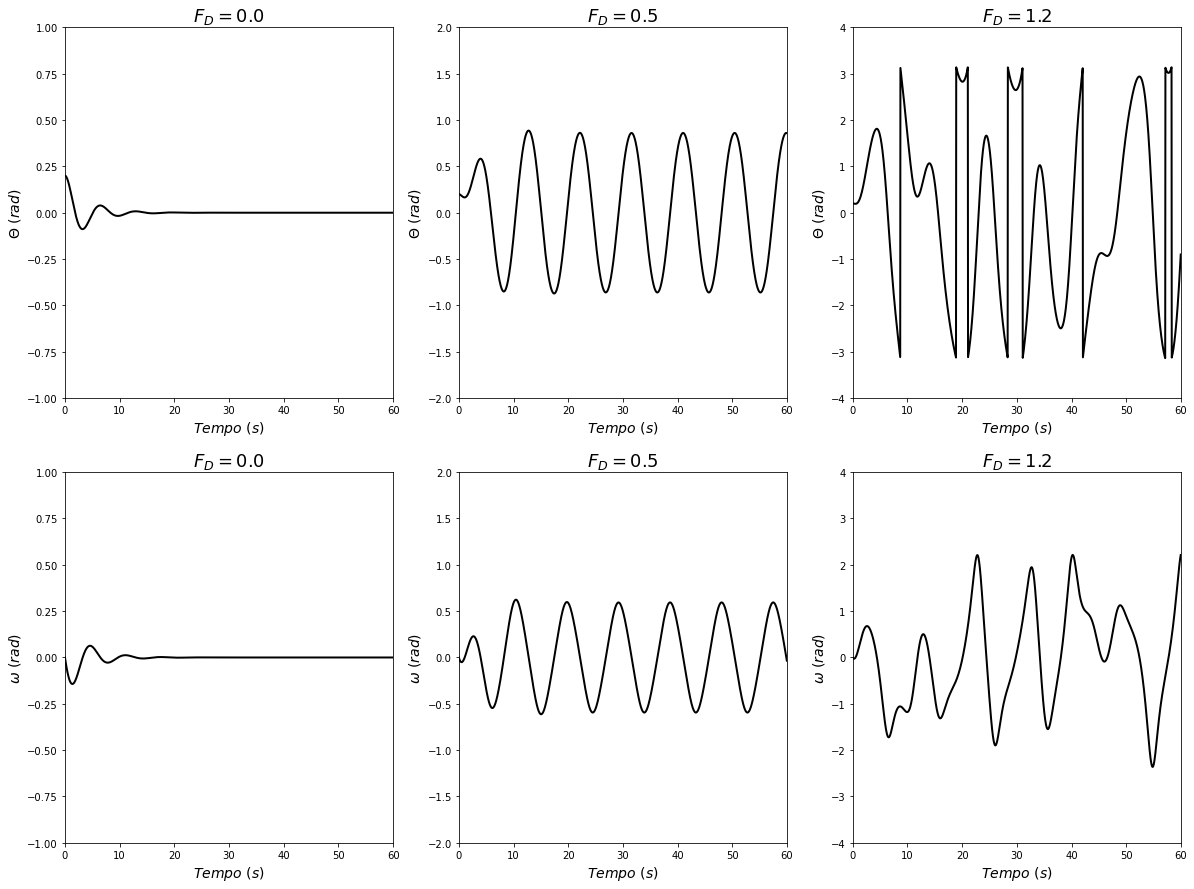

In [115]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
plt.plot(tempofor[0],thetafor[0],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.title(r'$F_D = %.1f$'%fd[0],fontsize = 18)
plt.xlim(t0,tf)
plt.ylim(-1,1)

plt.subplot(2,3,2)
plt.plot(tempofor[1],thetafor[1],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.title(r'$F_D = %.1f$'%fd[1],fontsize = 18)
plt.xlim(t0,tf)
plt.ylim(-2,2)

plt.subplot(2,3,3)
plt.plot(tempofor[2],thetafor[2],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.title(r'$F_D = %.1f$'%fd[2],fontsize = 18)
plt.xlim(t0,tf)
plt.ylim(-4,4)

plt.subplot(2,3,4)
plt.plot(tempofor[0],omegafor[0],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad)$',fontsize = 14)
plt.title(r'$F_D = %.1f$'%fd[0],fontsize = 18)
plt.xlim(t0,tf)
plt.ylim(-1,1)

plt.subplot(2,3,5)
plt.plot(tempofor[1],omegafor[1],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad)$',fontsize = 14)
plt.title(r'$F_D = %.1f$'%fd[1],fontsize = 18)
plt.xlim(t0,tf)
plt.ylim(-2,2)

plt.subplot(2,3,6)
plt.plot(tempofor[2],omegafor[2],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad)$',fontsize = 14)
plt.title(r'$F_D = %.1f$'%fd[2],fontsize = 18)
plt.xlim(t0,tf)
plt.ylim(-4,4)

plt.show()

Com a amplitude da força motriz ($F_D = 0$), o movimento é amortecido e o pêndulo para após algumas oscilações. Essas oscilações têm frequência próxima á frequência natural do pêndulo não amortecido. 

Com uma pequena força motriz ($F_D = 0.5$), encontramos dois regimes. As primeiras poucas oscilações são afetadas pela decadência de um transiente inicial, como no caso de nenhuma força motriz aplicada. Depois que esse transiente é amortecido, o pêndulo se estabiliza em uma oscilação constante em resposta à $F_D$, movendo-se segundo uma frequência $\Omega_D$, com uma amplitude determinada por um equilibrio entre a energia adicionada por $F_D$ e dissipada pelo amortecimento.

Para $F_D = 1.2$, o movimento não é mais tão simples, mesmo em tempos longos. O pêndulo desloca-se completando todo o giro, como podemos ver nos gráficos com ou sem os ajustes ($-\pi\ < \theta < \pi$). Com os resultados apresentados não podemos concluir quando o pêndulo irá se acomodar ou descreverá um movimento estacionário repetitivo. Podemos supor que esta "zona de instabilidade" ou transiente, seja longo o suficiente que não podemos determinar seu regime estacionário no tempo de análise proposto. Entre isso não é verdade, independente do tempo ou da força motriz ($F_D$) estabelecidos o movimento nunca se repetirá, pois trata-se de um exemplo de movimento caótico.

### Análise da energia total do sistema

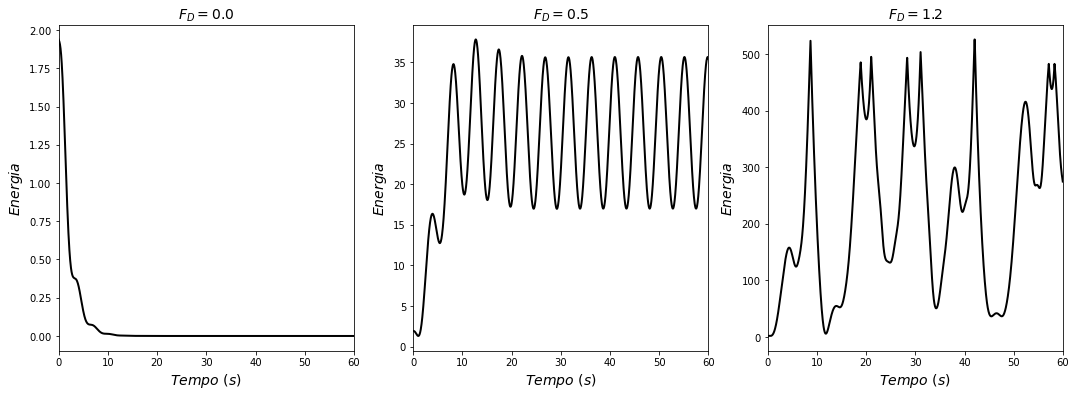

In [116]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(tempofor[0],energfor[0],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.title(r'$F_D = %.1f$'%fd[0],fontsize = 14)
plt.xlim(t0,tf)

plt.subplot(1,3,2)
plt.plot(tempofor[1],energfor[1],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.title(r'$F_D = %.1f$'%fd[1],fontsize = 14)
plt.xlim(t0,tf)

plt.subplot(1,3,3)
plt.plot(tempofor[2],energfor[2],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.title(r'$F_D = %.1f$'%fd[2],fontsize = 14)
plt.xlim(t0,tf)

plt.show()

### Movimento Caótico

Imaginamos que temos dois pêndulos idênticos, com exatamente o mesmo comprimento e fatores de amortecimento. Nós os colocamos em movimento ao mesmo tempo, com as mesmas forças motrizes. A única diferença é que os iniciamos com ângulos ligeiramente diferentes. Podemos determinar a função horária para cada um destes pêndulos por meio dos algoritmos já apresentados, o que mais nos interessa no momento é definir uma variação entre cada uma das medidas dado por $\Delta \theta = |\theta_1 - \theta_2|$. Assim analisaremos o comportamento de $\Delta \theta$ no tempo para $F_D$ = 0.0, 0.5, 1,2, 1,5 e 2,0

In [77]:
def metEulerCromerPendFisicorad(t0,tf,dt,theta0,omega_0,g,l,q,ud,fd):
    t = np.arange(t0,tf,dt)
    n = len(t)
    
    theta = [theta0]
    omega = [omega_0]
    
    for i in range(0,n-1):              
        omeg = omega[i] - ((g/l)*np.sin(theta[i]) + q*omega[i] - fd*np.sin(ud*t[i]))*dt      
        thet = theta[i] + omeg*dt 
        if thet > np.pi:
            thet = thet - 2*np.pi
        if thet < -np.pi:
            thet = thet + 2*np.pi
        omega.append(omeg)
        theta.append(thet)
        
    return theta,omega

In [78]:
t0 = 0
tf = 150
dt = 0.04
theta0 = [0.200,0.201]  
omega_0 = 0
g = 9.81
l = 9.81
q = 1/2
fd = [0, 0.5, 1, 1.2 , 1.5, 2.0]
ud = 2/3

t = np.arange(t0,tf,dt)
deltatheta = [] 
theta = []
omega = []

for m in range(len(fd)):
    thet = []
    omeg = []
    for i in range(len(theta0)):
        the,ome = metEulerCromerPendFisicorad(t0,tf,dt,theta0[i],omega_0,g,l,q,ud,fd[m])
        thet.append(the)
        omeg.append(ome)
    theta.append(thet)
    omega.append(omeg)
    
    deltthet = []
    for j in range(len(thet[0])):
        delta = abs(thet[0][j] - thet[1][j])
        deltthet.append(delta)
    
    deltatheta.append(deltthet)

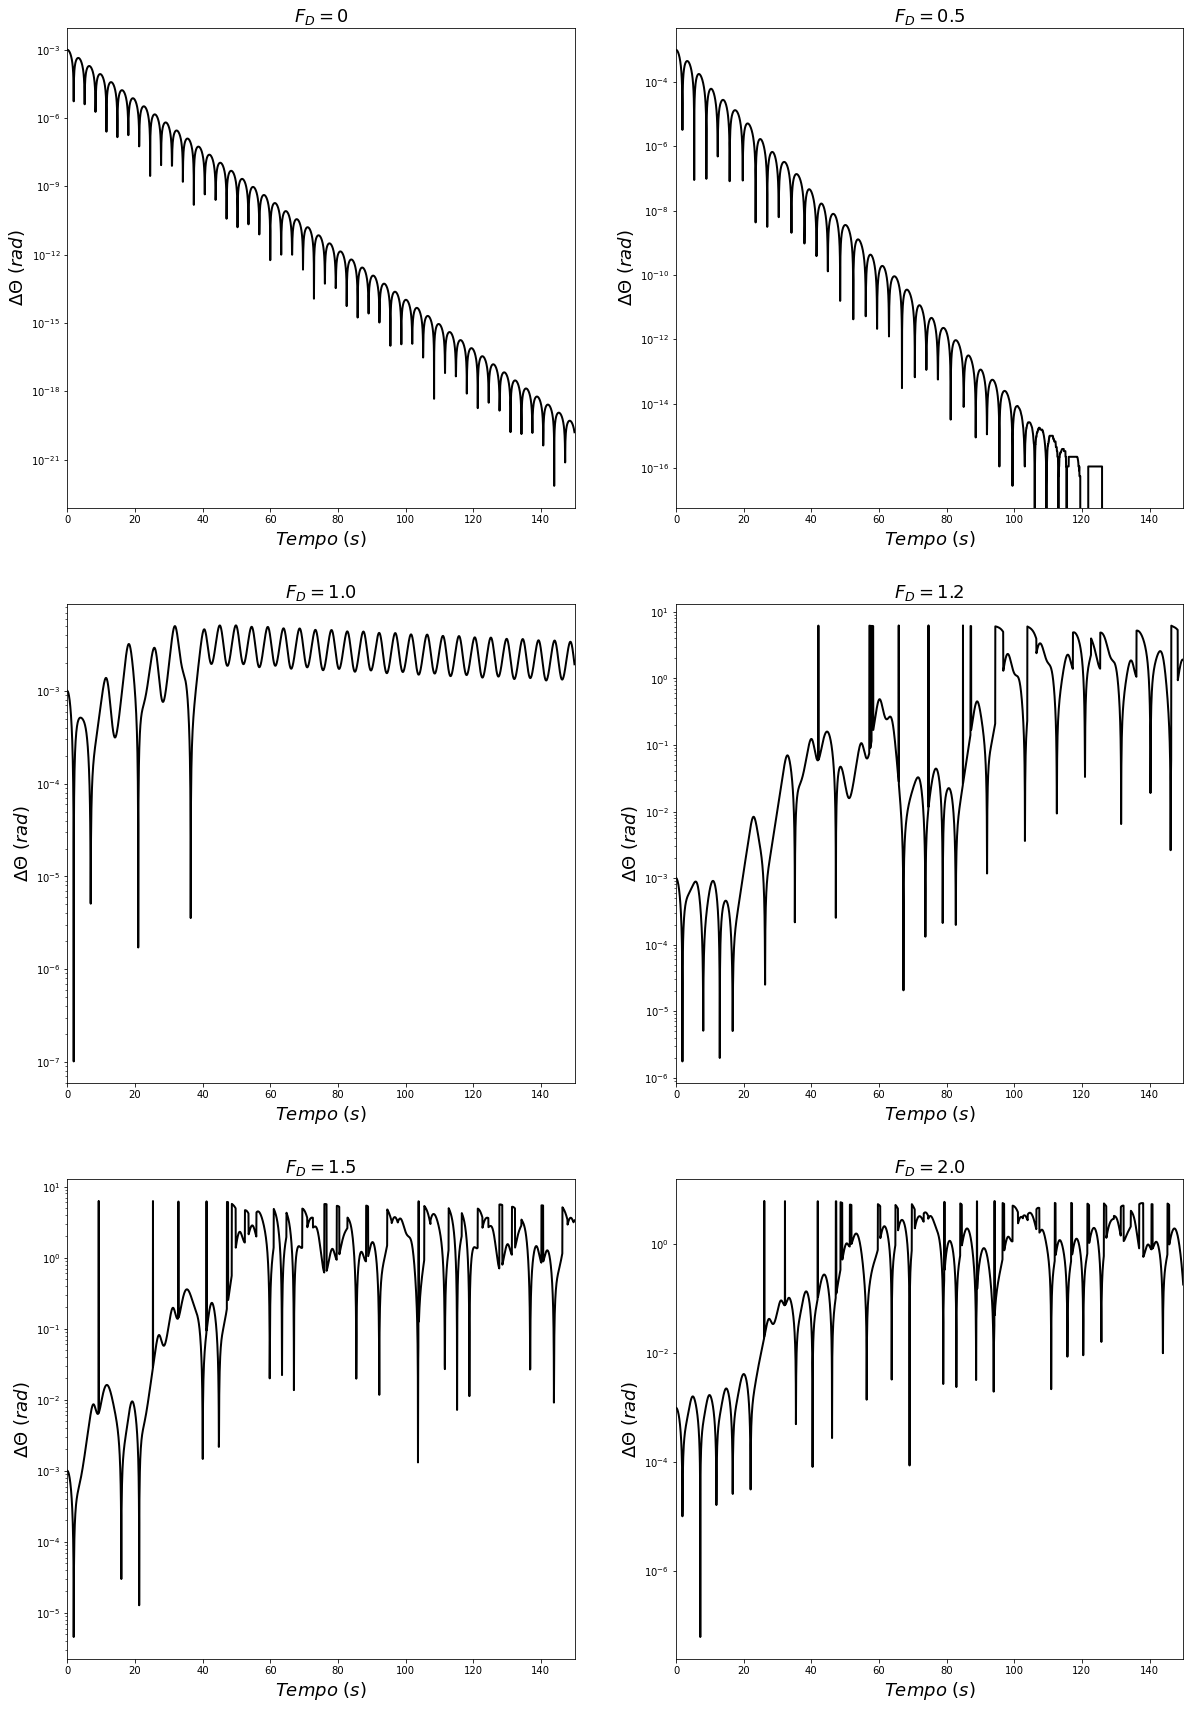

In [79]:
plt.figure(figsize=(20,30))

plt.subplot(3,2,1)
plt.yscale('log')
plt.title("$F_D = 0$",fontsize = 18)
plt.plot(t,deltatheta[0],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 18)
plt.ylabel('$\Delta\Theta\ (rad)$',fontsize = 18)
plt.xlim(t0,tf)

plt.subplot(3,2,2)
plt.yscale('log')
plt.title("$F_D = 0.5$",fontsize = 18)
plt.plot(t,deltatheta[1],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 18)
plt.ylabel('$\Delta\Theta\ (rad)$',fontsize = 18)
plt.xlim(t0,tf)

plt.subplot(3,2,3)
plt.yscale('log')
plt.title("$F_D = 1.0$",fontsize = 18)
plt.plot(t,deltatheta[2],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 18)
plt.ylabel('$\Delta\Theta\ (rad)$',fontsize = 18)
plt.xlim(t0,tf)

plt.subplot(3,2,4)
plt.yscale('log')
plt.title("$F_D = 1.2$",fontsize = 18)
plt.plot(t,deltatheta[3],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 18)
plt.ylabel('$\Delta\Theta\ (rad)$',fontsize = 18)
plt.xlim(t0,tf)

plt.subplot(3,2,5)
plt.yscale('log')
plt.title("$F_D = 1.5$",fontsize = 18)
plt.plot(t,deltatheta[4],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 18)
plt.ylabel('$\Delta\Theta\ (rad)$',fontsize = 18)
plt.xlim(t0,tf)

plt.subplot(3,2,6)
plt.yscale('log')
plt.title("$F_D = 2.0$",fontsize = 18)
plt.plot(t,deltatheta[5],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 18)
plt.ylabel('$\Delta\Theta\ (rad)$',fontsize = 18)
plt.xlim(t0,tf)

plt.show()

Para os menos valores de $F_D$, temos o modelo o qual encontramos o movimento oscilatório simples. Para ententer esses resultados, primeiro chamamos sua atenção para as quedas muito acentuadas que ocorrem aproximadamente a cada 3s. Essas quedas em $\Delta\theta$ ocorrem quando um dos pêndulos atinge um ponto de inflexão, assim $\Delta\theta$ desaparecerá em cada um destes pontos, uma vez que suas funções horários deverão se cruzar. Admitindo que este decréscimo ocorra de forma contante, como podemos observa nas regiões do platô destas variações, podemos supor que em um tempo longo o suficiente estes pêndulos tenterão a oscilar de modo semelhante, uma vez que sua diferença se aproxima a cada instante de zero. Isso significa que o movimento é previsível. Em constrate, para os maiores valores de $F_D$, descobrimos que $\Delta\theta$ aumenta rapidamente e irregularmente com t, o que nos leva a concluir que as funções horárias do movimento são divergentes. Mesmo obtento um comportamento crescente e arbitrário, para um tempo longo suficiente $\Delta\theta$ "satura" em um valor da ordem de $2\pi$ e simplesmente não podemos mais crescer. O que significa que dois pêndulos que começaram quase semelhantes apresentaram a cada instante movimento cada vez distintos, tornando o sistema imprevisível.  

Uma vez que um certo sistema comporta-se de modo imprevisível, determinar a função horária do movimento não acresentará informação ao modelo, devido a ausência de padrões no tempo. Mudando a abordagem e passando a analizar a velocidade angular ($\omega$) em função da posição ($\theta$), que chamamos de gráfico de espaço de fase, teremos:

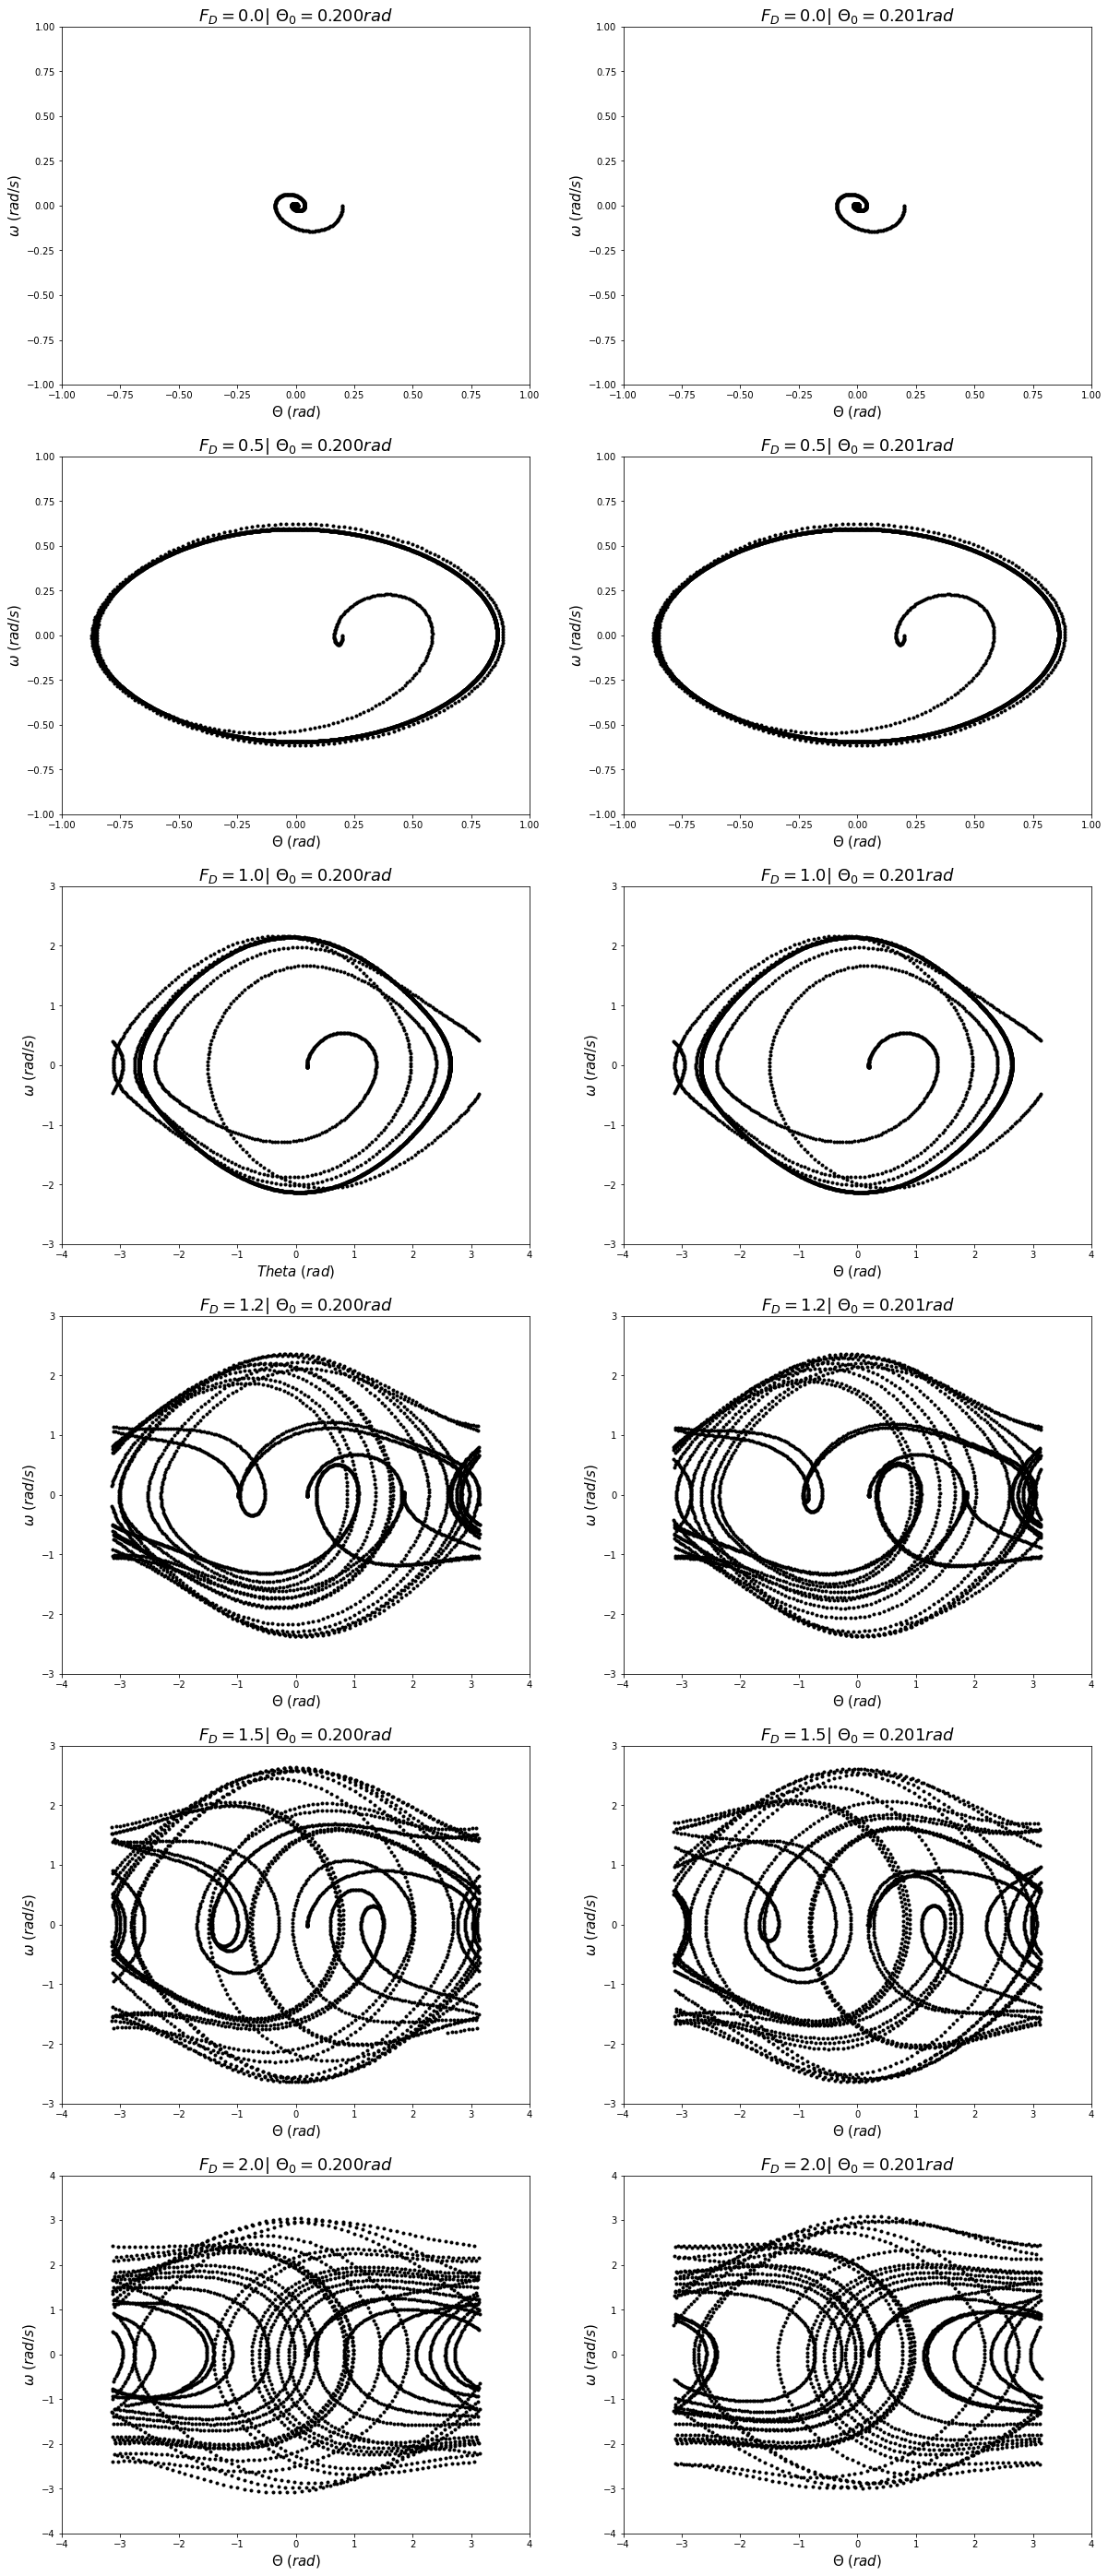

In [80]:
plt.figure(figsize=(20,50))

plt.subplot(6,2,1)
plt.title("$F_D = %.1f |\ \Theta_0 = %.3f rad$"%(fd[0],theta0[0]),fontsize = 18)
plt.plot(theta[0][0],omega[0][0],'.k')
plt.ylabel('$\omega\ (rad/s)$',fontsize = 15)
plt.xlabel('$\Theta\ (rad)$',fontsize = 15)
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.subplot(6,2,2)
plt.title("$F_D = %.1f |\ \Theta_0 = %.3f rad$"%(fd[0],theta0[1]),fontsize = 18)
plt.plot(theta[0][1],omega[0][1],'.k')
plt.ylabel('$\omega\ (rad/s)$',fontsize = 15)
plt.xlabel('$\Theta\ (rad)$',fontsize = 15)
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.subplot(6,2,3)
plt.title("$F_D = %.1f |\ \Theta_0 = %.3f rad$"%(fd[1],theta0[0]),fontsize = 18)
plt.plot(theta[1][0],omega[1][0],'.k')
plt.ylabel('$\omega\ (rad/s)$',fontsize = 15)
plt.xlabel('$\Theta\ (rad)$',fontsize = 15)
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.subplot(6,2,4)
plt.title("$F_D = %.1f |\ \Theta_0 = %.3f rad$"%(fd[1],theta0[1]),fontsize = 18)
plt.plot(theta[1][1],omega[1][1],'.k')
plt.ylabel('$\omega\ (rad/s)$',fontsize = 15)
plt.xlabel('$\Theta\ (rad)$',fontsize = 15)
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.subplot(6,2,5)
plt.title("$F_D = %.1f |\ \Theta_0 = %.3f rad$"%(fd[2],theta0[0]),fontsize = 18)
plt.plot(theta[2][0],omega[2][0],'.k')
plt.ylabel('$\omega\ (rad/s)$',fontsize = 15)
plt.xlabel('$Theta\ (rad)$',fontsize = 15)
plt.xlim(-4,4)
plt.ylim(-3,3)

plt.subplot(6,2,6)
plt.title("$F_D = %.1f |\ \Theta_0 = %.3f rad$"%(fd[2],theta0[1]),fontsize = 18)
plt.plot(theta[2][1],omega[2][1],'.k')
plt.ylabel('$\omega\ (rad/s)$',fontsize = 15)
plt.xlabel('$\Theta\ (rad)$',fontsize = 15)
plt.xlim(-4,4)
plt.ylim(-3,3)

plt.subplot(6,2,7)
plt.title("$F_D = %.1f |\ \Theta_0 = %.3f rad$"%(fd[3],theta0[0]),fontsize = 18)
plt.plot(theta[3][0],omega[3][0],'.k')
plt.ylabel('$\omega\ (rad/s)$',fontsize = 15)
plt.xlabel('$\Theta\ (rad)$',fontsize = 15)
plt.xlim(-4,4)
plt.ylim(-3,3)

plt.subplot(6,2,8)
plt.title("$F_D = %.1f |\ \Theta_0 = %.3f rad$"%(fd[3],theta0[1]),fontsize = 18)
plt.plot(theta[3][1],omega[3][1],'.k')
plt.ylabel('$\omega\ (rad/s)$',fontsize = 15)
plt.xlabel('$\Theta\ (rad)$',fontsize = 15)
plt.xlim(-4,4)
plt.ylim(-3,3)

plt.subplot(6,2,9)
plt.title("$F_D = %.1f |\ \Theta_0 = %.3f rad$"%(fd[4],theta0[0]),fontsize = 18)
plt.plot(theta[4][0],omega[4][0],'.k')
plt.ylabel('$\omega\ (rad/s)$',fontsize = 15)
plt.xlabel('$\Theta\ (rad)$',fontsize = 15)
plt.xlim(-4,4)
plt.ylim(-3,3)

plt.subplot(6,2,10)
plt.title("$F_D = %.1f |\ \Theta_0 = %.3f rad$"%(fd[4],theta0[1]),fontsize = 18)
plt.plot(theta[4][1],omega[4][1],'.k')
plt.ylabel('$\omega\ (rad/s)$',fontsize = 15)
plt.xlabel('$\Theta\ (rad)$',fontsize = 15)
plt.xlim(-4,4)
plt.ylim(-3,3)

plt.subplot(6,2,11)
plt.title("$F_D = %.1f |\ \Theta_0 = %.3f rad$"%(fd[5],theta0[0]),fontsize = 18)
plt.plot(theta[5][0],omega[5][0],'.k')
plt.ylabel('$\omega\ (rad/s)$',fontsize = 15)
plt.xlabel('$\Theta\ (rad)$',fontsize = 15)
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.subplot(6,2,12)
plt.title("$F_D = %.1f |\ \Theta_0 = %.3f rad$"%(fd[5],theta0[1]),fontsize = 18)
plt.plot(theta[5][1],omega[5][1],'.k')
plt.ylabel('$\omega\ (rad/s)$',fontsize = 15)
plt.xlabel('$\Theta\ (rad)$',fontsize = 15)
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.show()

## Método Rugge-Kutta

$$ x(t + \Delta t) = x(t) + f(x',t') \Delta t$$

onde 

$ x' = x(t) + \dfrac{1}{2} f(x(t),t) \Delta t$

$t' = t + \dfrac{1}{2} \Delta t$

A inclinação $\dfrac{dx}{dt}$ aplicada a $t_m$ é estimada como o valor de $f(x',t')$, onde t' é o ponto médio do intervalo e x' é o valor aproximado de Euler de x em t'. Este procedimento numerico é denominado de método de Rugge-Kutta de segunda ordem.

#### Aproximação geral de Rugge-Kutta
Pode-se aproximar a inclinação $\dfrac{dx}{dt}$ por deversas maneiras, de modo a concordar com a expansão de Taylor. Para a aproximação geral de  Rugge-Kutta estima-se esta por uma média ponderada de varios termos da forma $f(x'_i,y'_i)$ onde $t'_i$ (i = 1, 2, ...) são valores adequadamente escolhidos no intervalo $[t, t+ \Delta t]$ e são obtidos usando algumas aproximações Euler ou algo semelhante para $x(t'_i)$. Mesmo nos limitando a esse tipo de aproximação, há um número infinito de escolhas de segunda ordem. 

Uma aproximação popular de ordem superior é o método de Runge-Kutta de quarta ordem, definida por

$$ x(t + \Delta t) \equiv x(t) + \dfrac{1}{6} [f(x'_1,t'_1) + 2 f(x'_2,t'_2) + 2 f(x'_3,t'_3) + f(x'_4,t'_4)] \Delta t$$

onde 

$ x'_1 = x(t)\ \ \ \ \ \ \ \ t'_1 = t$

$ x'_2 = x(t) + \dfrac{1}{2} f(x'_1,t'_1) \Delta t\ \ \ \ \ \ \ \ t'_2 = t + \dfrac{1}{2} \Delta t $

$ x'_3 = x(t) + \dfrac{1}{2} f(x'_2,t'_2) \Delta t\ \ \ \ \ \ \ \ t'_3 = t + \dfrac{1}{2} \Delta t $

$ x'_4 = x(t) + f(x'_3,t'_3) \Delta t\ \ \ \ \ \ \ \ t'_4 = t +  \Delta t $

Para o modelo do pêndulo temos as seguintes formulações

$I)\ \  \dfrac{d^2\theta}{dt^2} = - \dfrac{g}{l} \theta $

$II)\ \ \dfrac{d^2\theta}{dt^2} = - \dfrac{g}{l} \theta  - q \dfrac{d\theta}{dt} $

$III)\ \ \dfrac{d^2\theta}{dt^2} = - \dfrac{g}{l} \theta  - q \dfrac{d\theta}{dt} + F_D\ sin(\Omega_D\ t)$

$IV)\ \ \dfrac{d^2\theta}{dt^2} = - \dfrac{g}{l} sin\ \theta $

$V)\ \ \dfrac{d^2\theta}{dt^2} = - \dfrac{g}{l} sin\ \theta  - q \dfrac{d\theta}{dt} + F_D\ sin(\Omega_D\ t)$

### Aplicação do método de Runge-Kutta de segunda ordem

### Modelo 1

$$ \dfrac{d^2\theta}{dt^2} = - \dfrac{g}{l} \theta $$

In [81]:
def metRuggeKuttaSegOrdI(t0,tf,dt,theta0_grau,omega_0,g,l,m):
    t = np.arange(t0,tf,dt)
    n = len(t)
    alfa = (np.pi*theta0_grau)/180
    energ = ((m*(l**2))/2)*((omega_0**2)+((g/l)*(alfa**2)))
    
    theta = [alfa]
    omega = [omega_0]
    energia = [energ]
    
    for i in range(0,n-1):
        th = theta[i] + (1/2)*omega[i]*dt
        om = omega[i] - (1/2)*((g/l)*theta[i])*dt
        
        omeg = omega[i] - ((g/l)*th)*dt             
        thet = theta[i] + om*dt 
        
        en = ((m*(l**2))/2)*((omeg**2)+((g/l)*(thet**2)))
        theta.append(thet)
        omega.append(omeg)
        energia.append(en)
        
    return theta,omega,energia

In [82]:
t0 = 0
tf = 20
dt = 0.01
theta0_grau = 10
omega_0 = 0
g = 9.81
l = 1.0
m = 1.0

t = np.arange(t0,tf,dt)

a,b,c = metRuggeKuttaSegOrdI(t0,tf,dt,theta0_grau,omega_0,g,l,m)

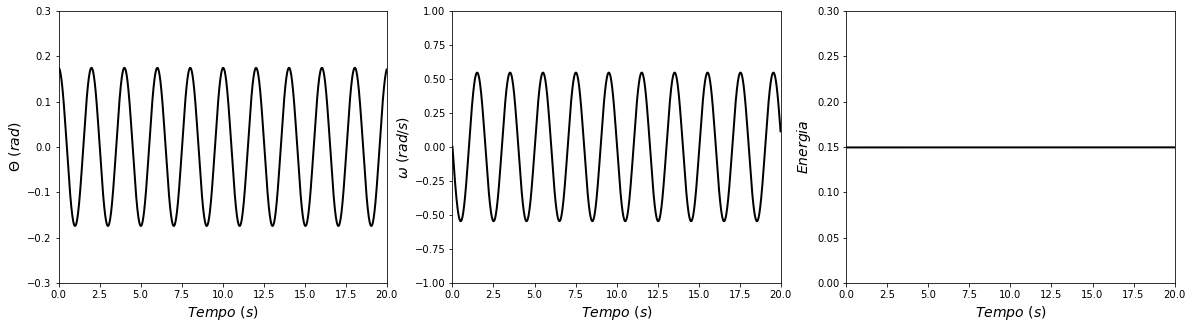

In [83]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(t,a,'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(1,3,2)
plt.plot(t,b,'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(1,3,3)
plt.plot(t,c,'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.3)

plt.show()

### Modelo 2

$$ \dfrac{d^2\theta}{dt^2} = - \dfrac{g}{l} \theta  - q \dfrac{d\theta}{dt} $$

In [84]:
def metRuggeKuttaSegOrdII(t0,tf,dt,theta0_grau,omega_0,g,l,m,q):
    t = np.arange(t0,tf,dt)
    n = len(t)
    alfa = (np.pi*theta0_grau)/180
    energ = ((m*(l**2))/2)*((omega_0**2)+((g/l)*(alfa**2)))
    
    theta = [alfa]
    omega = [omega_0]
    energia = [energ]
    
    for i in range(0,n-1):
        th = theta[i] + (1/2)*omega[i]*dt
        om = omega[i] - (1/2)*((g/l)*theta[i] + q*omega[i])*dt
        
        omeg = omega[i] - ((g/l)*th + q*om)*dt             
        thet = theta[i] + om*dt 
        
        en = ((m*(l**2))/2)*((omeg**2)+((g/l)*(thet**2)))
        theta.append(thet)
        omega.append(omeg)
        energia.append(en)
        
    return theta,omega,energia

In [85]:
t0 = 0
tf = 20
dt = 0.01
theta0_grau = 10
omega_0 = 0
g = 9.81
l = 1.0
m = 1.0
q = [0.0,0.5,1.0,1.5,2.0,3.0]

t = np.arange(t0,tf,dt)

thetaII = []
omegaII = []
energiaII = []

for i in range(len(q)):
    a,b,c = metRuggeKuttaSegOrdII(t0,tf,dt,theta0_grau,omega_0,g,l,m,q[i])
    thetaII.append(a)
    omegaII.append(b)
    energiaII.append(c)

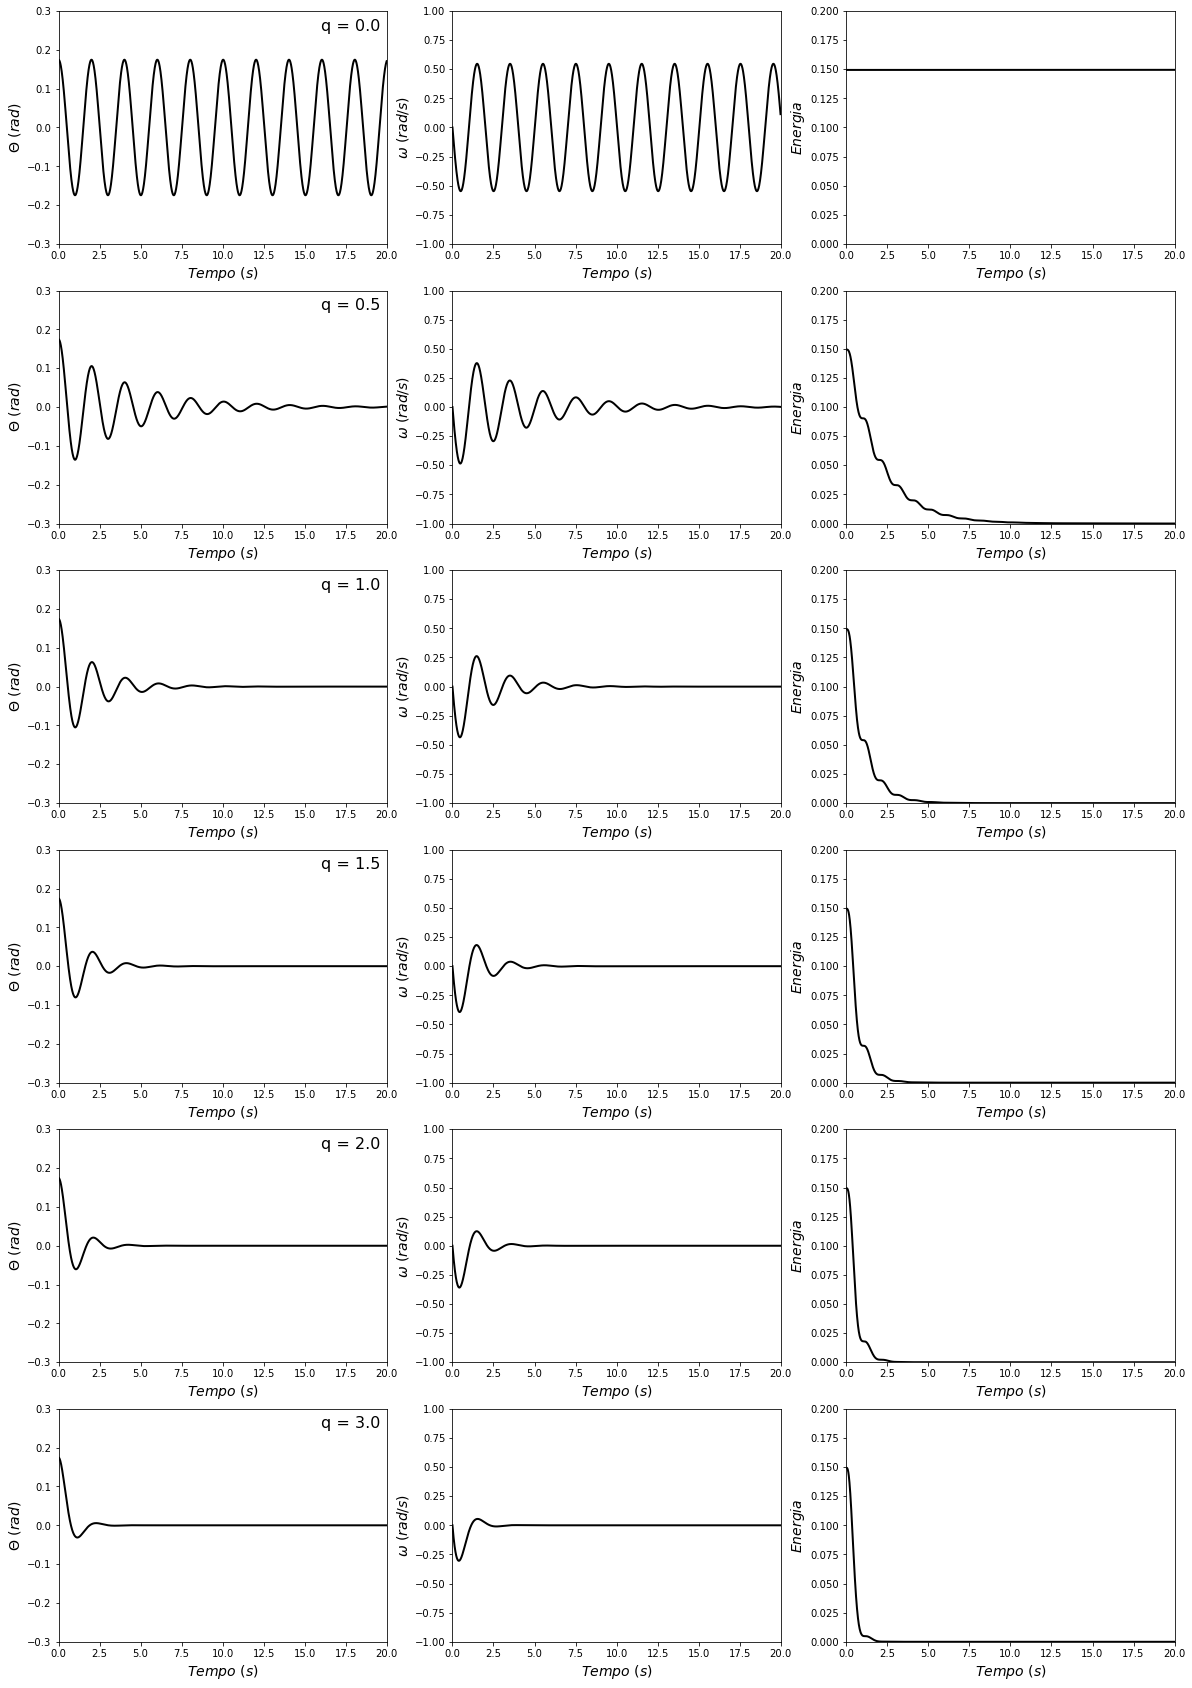

In [86]:
plt.figure(figsize=(20,30))

#--------------------- q = 0.0 -------------------------
plt.subplot(6,3,1)
plt.plot(t,thetaII[0],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[0], xy=(16, 0.25), xytext=(16, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,2)
plt.plot(t,omegaII[0],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,3)
plt.plot(t,energiaII[0],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.2)

#--------------------- q = 0.5 -------------------------
plt.subplot(6,3,4)
plt.plot(t,thetaII[1],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[1], xy=(16, 0.25), xytext=(16, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,5)
plt.plot(t,omegaII[1],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,6)
plt.plot(t,energiaII[1],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.2)

#--------------------- q = 1.0 -------------------------
plt.subplot(6,3,7)
plt.plot(t,thetaII[2],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[2], xy=(16, 0.25), xytext=(16, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,8)
plt.plot(t,omegaII[2],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,9)
plt.plot(t,energiaII[2],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.2)

#--------------------- q = 1.5 -------------------------
plt.subplot(6,3,10)
plt.plot(t,thetaII[3],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[3], xy=(16, 0.25), xytext=(16, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,11)
plt.plot(t,omegaII[3],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,12)
plt.plot(t,energiaII[3],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.2)

#--------------------- q = 2,0 -------------------------
plt.subplot(6,3,13)
plt.plot(t,thetaII[4],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[4], xy=(16, 0.25), xytext=(16, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,14)
plt.plot(t,omegaII[4],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,15)
plt.plot(t,energiaII[4],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.2)

#--------------------- q = 3.0 -------------------------
plt.subplot(6,3,16)
plt.plot(t,thetaII[5],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[5], xy=(16, 0.25), xytext=(16, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,17)
plt.plot(t,omegaII[5],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,18)
plt.plot(t,energiaII[5],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.2)

plt.show()

### Modelo 3

$$ \dfrac{d^2\theta}{dt^2} = - \dfrac{g}{l} \theta  - q \dfrac{d\theta}{dt} + F_D\ sin(\Omega_D\ t) $$

In [87]:
def metRuggeKuttaSegOrdIII(t0,tf,dt,theta0_grau,omega_0,g,l,m,q,fd,ud):
    t = np.arange(t0,tf,dt)
    n = len(t)
    alfa = (np.pi*theta0_grau)/180
    energ = ((m*(l**2))/2)*((omega_0**2)+((g/l)*(alfa**2)))
    
    theta = [alfa]
    omega = [omega_0]
    energia = [energ]
    
    for i in range(0,n-1):
        th = theta[i] + (1/2)*omega[i]*dt
        om = omega[i] - (1/2)*((g/l)*theta[i] + q*omega[i] - fd*np.sin(ud*t[i]))*dt
        tt = t[i] + (1/2)*dt
        
        omeg = omega[i] - ((g/l)*th + q*om - fd*np.sin(ud*tt))*dt             
        thet = theta[i] + om*dt 
        
        en = ((m*(l**2))/2)*((omeg**2)+((g/l)*(thet**2)))
        theta.append(thet)
        omega.append(omeg)
        energia.append(en)
        
    return theta,omega,energia

In [88]:
t0 = 0
tf = 20
dt = 0.01
theta0_grau = 11.5
omega_0 = 0
g = 9.8
l = 1.0
m = 1.0
q = [0.0,0.5,1.0,1.5,2.0,3.0]
fd = 0.2
ud = 2
t = np.arange(t0,tf,dt)

thetaIII = []
omegaIII =  []
energiaIII = []

for j in range(len(q)):
    a,b,c = metRuggeKuttaSegOrdIII(t0,tf,dt,theta0_grau,omega_0,g,l,m,q[j],fd,ud)
    energiaIII.append(c)
    thetaIII.append(a)
    omegaIII.append(b)

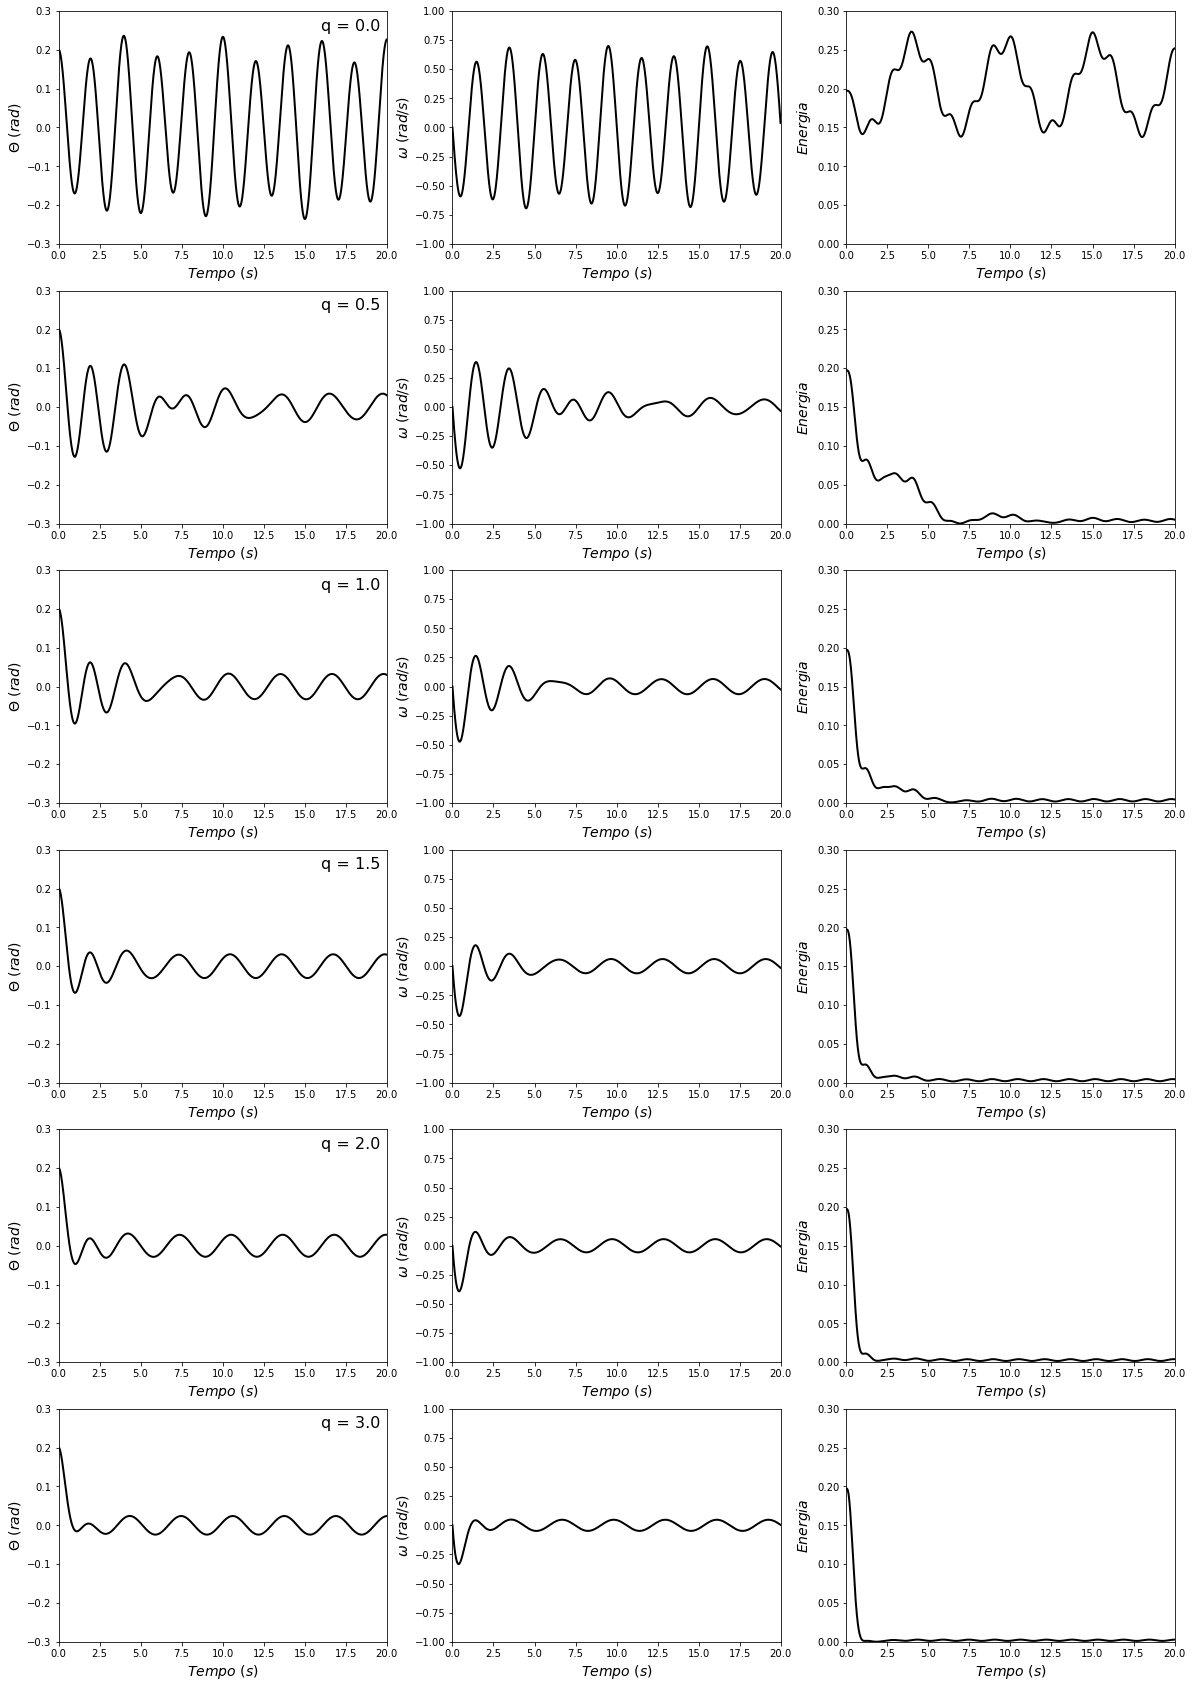

In [89]:
plt.figure(figsize=(20,30))

#--------------------- q = 0.0 -------------------------
plt.subplot(6,3,1)
plt.plot(t,thetaIII[0],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[0], xy=(16, 0.25), xytext=(16, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,2)
plt.plot(t,omegaIII[0],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,3)
plt.plot(t,energiaIII[0],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.3)

#--------------------- q = 0.5 -------------------------
plt.subplot(6,3,4)
plt.plot(t,thetaIII[1],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[1], xy=(16, 0.25), xytext=(16, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,5)
plt.plot(t,omegaIII[1],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,6)
plt.plot(t,energiaIII[1],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.3)

#--------------------- q = 1.0 -------------------------
plt.subplot(6,3,7)
plt.plot(t,thetaIII[2],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[2], xy=(16, 0.25), xytext=(16, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,8)
plt.plot(t,omegaIII[2],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,9)
plt.plot(t,energiaIII[2],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.3)

#--------------------- q = 1.5 -------------------------
plt.subplot(6,3,10)
plt.plot(t,thetaIII[3],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[3], xy=(16, 0.25), xytext=(16, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,11)
plt.plot(t,omegaIII[3],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,12)
plt.plot(t,energiaIII[3],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.3)

#--------------------- q = 2,0 -------------------------
plt.subplot(6,3,13)
plt.plot(t,thetaIII[4],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[4], xy=(16, 0.25), xytext=(16, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,14)
plt.plot(t,omegaIII[4],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,15)
plt.plot(t,energiaIII[4],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.3)

#--------------------- q = 3.0 -------------------------
plt.subplot(6,3,16)
plt.plot(t,thetaIII[5],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[5], xy=(16, 0.25), xytext=(16, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,17)
plt.plot(t,omegaIII[5],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,18)
plt.plot(t,energiaIII[5],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.3)

plt.show()

Como já foi discutido em seções anteriores, o modelo que combina o amortecimento e a força motriz para pequenas oscilações nos permite observa um mudança brusca na amplitude de oscilação quando sua frequência aproxima-se da frequência natural do oscilador simples, que denominamos por ressonância. Como a frequência natural é $\Omega = \sqrt{g/l}$, que resulta em $\Omega \approx 3.13$. Assim admitindo $\Omega_D = 3.2$ teremos a descrição do movimento para esta condição de contorno. Consideraremos para esta situação valores de q pequeno o suficiente para que tanto o amortecimento como a ressonância sejam facilmente visualizadas.

In [91]:
t0 = 0
tf = 20
dt = 0.01
theta0_grau = 11.5
omega_0 = 0
g = 9.8
l = 1.0
m = 1.0
q = [0.0,0.25,0.5,0.75,1.0,2.0]
fd = 0.2
ud = 3.2
t = np.arange(t0,tf,dt)

thetaIIIr = []
omegaIIIr =  []
energiaIIIr = []

for j in range(len(q)):
    a,b,c = metRuggeKuttaSegOrdIII(t0,tf,dt,theta0_grau,omega_0,g,l,m,q[j],fd,ud)
    energiaIIIr.append(c)
    thetaIIIr.append(a)
    omegaIIIr.append(b)

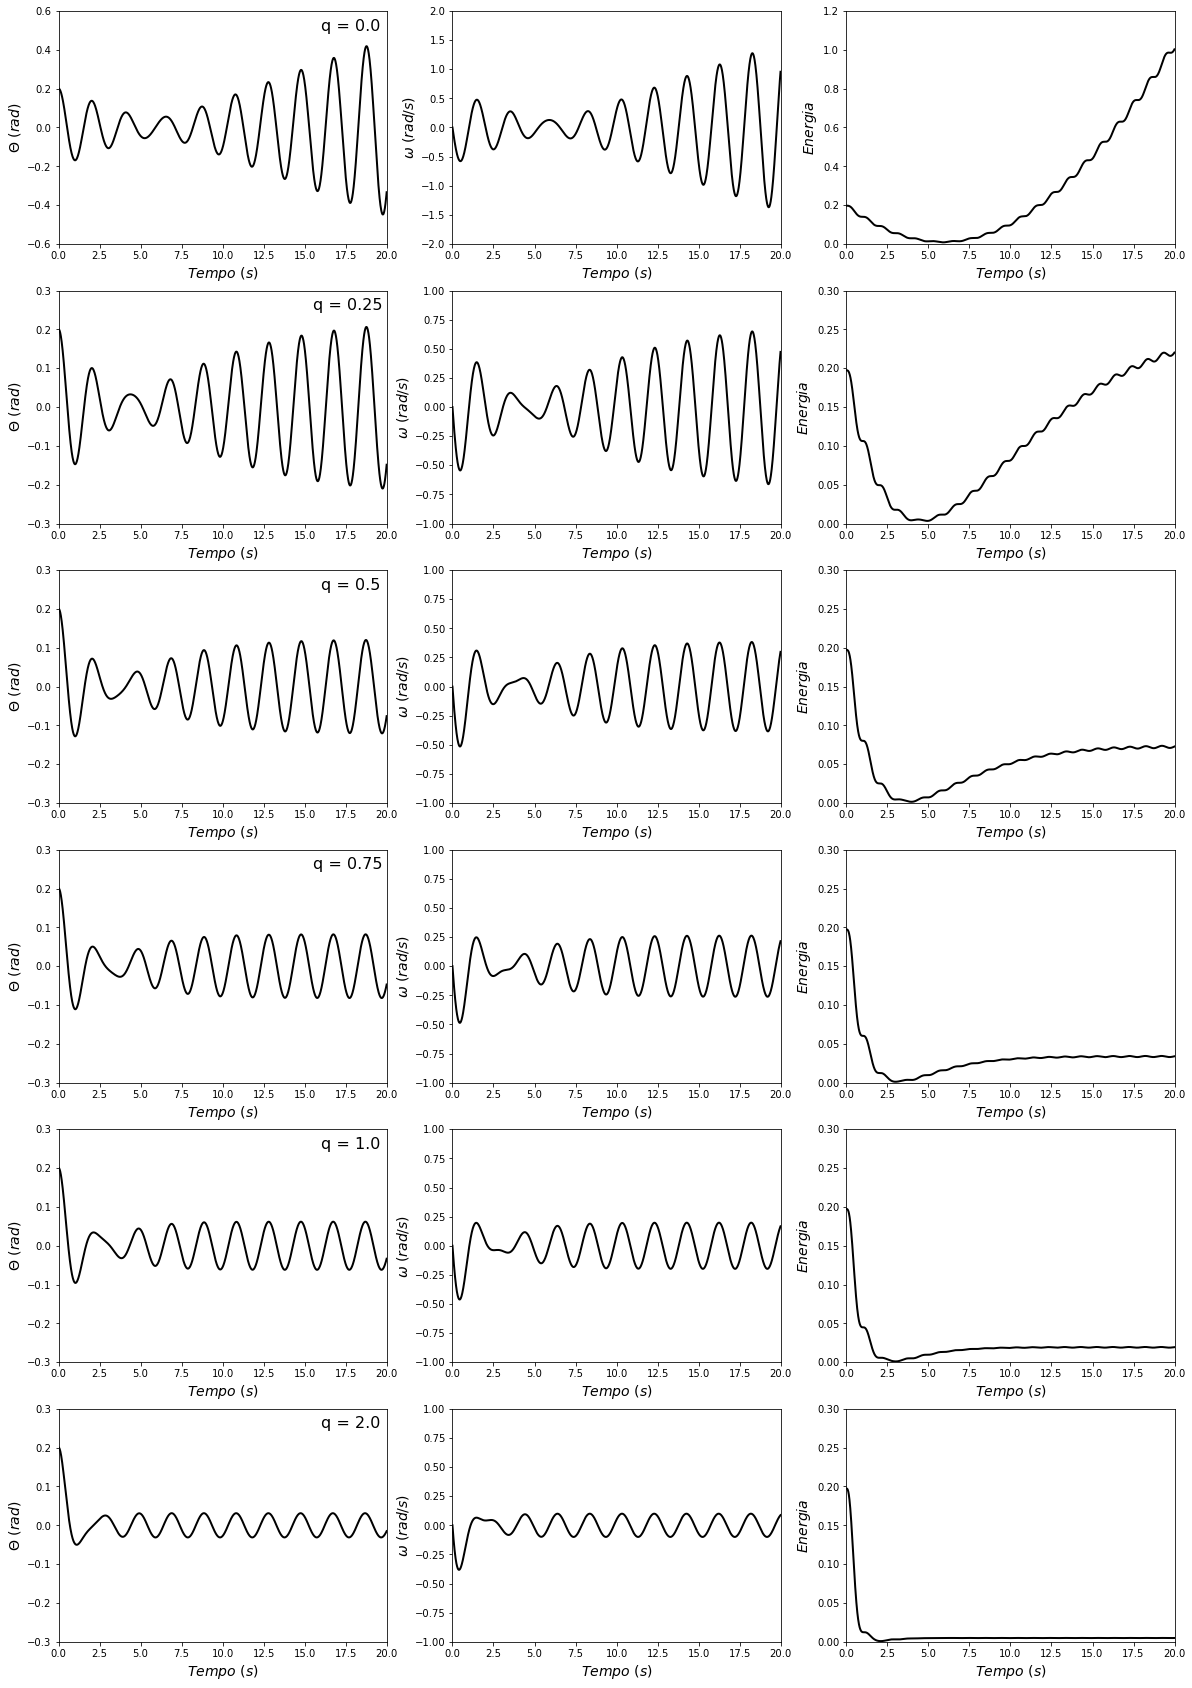

In [92]:
plt.figure(figsize=(20,30))

#----------------------------------------------
plt.subplot(6,3,1)
plt.plot(t,thetaIIIr[0],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[0], xy=(16, 0.5), xytext=(16, 0.5),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.6,0.6)
             
plt.subplot(6,3,2)
plt.plot(t,omegaIIIr[0],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-2,2)
             
plt.subplot(6,3,3)
plt.plot(t,energiaIIIr[0],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,1.2)

#----------------------------------------------
plt.subplot(6,3,4)
plt.plot(t,thetaIIIr[1],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.2f'%q[1], xy=(15.5, 0.25), xytext=(15.5, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,5)
plt.plot(t,omegaIIIr[1],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,6)
plt.plot(t,energiaIIIr[1],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.3)

#----------------------------------------------
plt.subplot(6,3,7)
plt.plot(t,thetaIIIr[2],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[2], xy=(16, 0.25), xytext=(16, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,8)
plt.plot(t,omegaIIIr[2],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,9)
plt.plot(t,energiaIIIr[2],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.3)

#----------------------------------------------
plt.subplot(6,3,10)
plt.plot(t,thetaIIIr[3],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.2f'%q[3], xy=(15.5, 0.25), xytext=(15.5, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,11)
plt.plot(t,omegaIIIr[3],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,12)
plt.plot(t,energiaIIIr[3],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.3)

#---------------------------------------------
plt.subplot(6,3,13)
plt.plot(t,thetaIIIr[4],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[4], xy=(16, 0.25), xytext=(16, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,14)
plt.plot(t,omegaIIIr[4],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,15)
plt.plot(t,energiaIIIr[4],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.3)

#----------------------------------------------
plt.subplot(6,3,16)
plt.plot(t,thetaIIIr[5],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\Theta\ (rad)$',fontsize = 14)
plt.annotate(r'q = %.1f'%q[5], xy=(16, 0.25), xytext=(16, 0.25),fontsize = 16)
plt.xlim(t0,tf)
plt.ylim(-0.3,0.3)
             
plt.subplot(6,3,17)
plt.plot(t,omegaIIIr[5],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$\omega\ (rad/s)$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(-1,1)
             
plt.subplot(6,3,18)
plt.plot(t,energiaIIIr[5],'-k',linewidth = 2.0)
plt.xlabel('$Tempo\ (s)$',fontsize = 14)
plt.ylabel('$Energia$',fontsize = 14)
plt.xlim(t0,tf)
plt.ylim(0,0.3)

plt.show()

### Método de Kugge-Kutta de quarta ordem

Análise da ressonância na oscilação forçada 

In [27]:
def metRuggeKuttaQuartOrd(t0,tf,dt,theta0_grau,omega_0,g,l,m,q,fd,ud):
    t = np.arange(t0,tf,dt)
    n = len(t)
    alfa = (np.pi*theta0_grau)/180
    energ = ((m*(l**2))/2)*((omega_0**2)+((g/l)*(alfa**2)))
    
    theta = [alfa]
    omega = [omega_0]
    energia = [energ]
    
    for i in range(0,n-1):
        th1 = theta[i]
        om1 = omega[i]
        t1 = t[i]
        
        th2 = theta[i] + (1/2)*om1*dt
        f1 = -(g/l)*th1 - q*om1 + fd*np.sin(ud*t1)
        om2 = omega[i] + (1/2)*(f1)*dt
        t2 = t[i] + (1/2)*dt
        
        th3 = theta[i] + (1/2)*om2*dt
        f2 = -(g/l)*th2 - q*om2 + fd*np.sin(ud*t2)
        om3 = omega[i] + (1/2)*(f2)*dt
        t3 = t[i] + (1/2)*dt
        
        th4 = theta[i] + (1/2)*om3*dt
        f3 = -(g/l)*th3 - q*om3 + fd*np.sin(ud*t3)
        om4 = omega[i] + (1/2)*(f3)*dt
        t4 = t[i] + dt
        
        f4 = -(g/l)*th4 - q*om4 + fd*np.sin(ud*t4)
        
        omeg = omega[i] + (1/6)*(f1+2*f2+2*f3+f4)*dt            
        thet = theta[i] + (1/6)*(om1+2*om2+2*om3+om4)*dt 
        
        en = ((m*(l**2))/2)*((omeg**2)+((g/l)*(thet**2)))
        theta.append(thet)
        omega.append(omeg)
        energia.append(en)
        
    return theta,omega,energia

In [28]:
t0 = 0
tf = 20
dt = 0.01
theta0_grau = 0.0
omega_0 = 0.0
g = 9.81
l = 1.0
m = 1.0
w_0 = np.sqrt(g/l)
fd = 0.5
qr = np.arange(0,1.1,0.1)
w_u = np.arange(1,5,0.01)
t = np.arange(t0,tf,dt)

thetark = []
amplituderk = []

for j in range(len(qr)):
    thetanq = []
    amplitnq = []
    for y in range(len(w_u)):
        th,om,en = metRuggeKuttaQuartOrd(t0,tf,dt,theta0_grau,omega_0,g,l,m,qr[j],fd,w_u[y])
        a = max(th[1000:2000])
        amplitnq.append(a)
        thetanq.append(th)
    thetark.append(thetanq)
    amplituderk.append(amplitnq)

ressrk = []
for r in range(len(w_u)):
    razaon = w_u[r]/w_0
    ressrk.append(razaon)

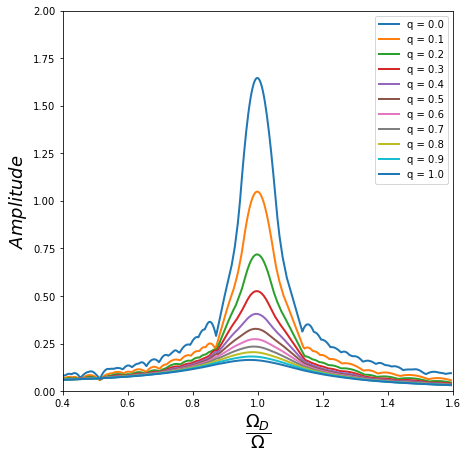

In [30]:
plt.figure(figsize=(7,7))

plt.plot(ressrk,amplituderk[0], label = "q = %.1f"%qr[0],linewidth = 2.0)
plt.plot(ressrk,amplituderk[1], label = "q = %.1f"%qr[1],linewidth = 2.0)
plt.plot(ressrk,amplituderk[2], label = "q = %.1f"%qr[2],linewidth = 2.0)
plt.plot(ressrk,amplituderk[3], label = "q = %.1f"%qr[3],linewidth = 2.0)
plt.plot(ressrk,amplituderk[4], label = "q = %.1f"%qr[4],linewidth = 2.0)
plt.plot(ressrk,amplituderk[5], label = "q = %.1f"%qr[5],linewidth = 2.0)
plt.plot(ressrk,amplituderk[6], label = "q = %.1f"%qr[6],linewidth = 2.0)
plt.plot(ressrk,amplituderk[7], label = "q = %.1f"%qr[7],linewidth = 2.0)
plt.plot(ressrk,amplituderk[8], label = "q = %.1f"%qr[8],linewidth = 2.0)
plt.plot(ressrk,amplituderk[9], label = "q = %.1f"%qr[9],linewidth = 2.0)
plt.plot(ressrk,amplituderk[10], label = "q = %.1f"%qr[10],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10})
plt.xlabel(r'$\dfrac{\Omega_D}{\Omega}$',fontsize = 18)
plt.ylabel('$Amplitude$',fontsize = 18)
plt.xlim(0.4,1.6)
plt.ylim(0,2)

plt.show()

### Comparando os modelos para determinação da ressônancia

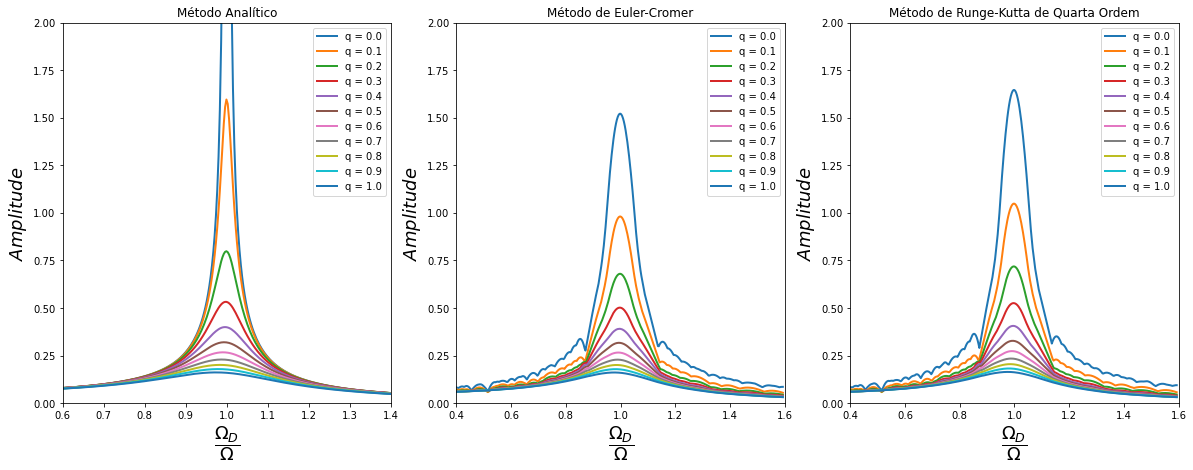

In [153]:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.plot(ress,amplitude[0], label = "q = %.1f"%q[0],linewidth = 2.0)
plt.plot(ress,amplitude[1], label = "q = %.1f"%q[1],linewidth = 2.0)
plt.plot(ress,amplitude[2], label = "q = %.1f"%q[2],linewidth = 2.0)
plt.plot(ress,amplitude[3], label = "q = %.1f"%q[3],linewidth = 2.0)
plt.plot(ress,amplitude[4], label = "q = %.1f"%q[4],linewidth = 2.0)
plt.plot(ress,amplitude[5], label = "q = %.1f"%q[5],linewidth = 2.0)
plt.plot(ress,amplitude[6], label = "q = %.1f"%q[6],linewidth = 2.0)
plt.plot(ress,amplitude[7], label = "q = %.1f"%q[7],linewidth = 2.0)
plt.plot(ress,amplitude[8], label = "q = %.1f"%q[8],linewidth = 2.0)
plt.plot(ress,amplitude[9], label = "q = %.1f"%q[9],linewidth = 2.0)
plt.plot(ress,amplitude[10], label = "q = %.1f"%q[10],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10})
plt.title("Método Analítico")
plt.xlabel(r'$\dfrac{\Omega_D}{\Omega}$',fontsize = 18)
plt.ylabel('$Amplitude$',fontsize = 18)
plt.xlim(0.6,1.4)
plt.ylim(0,2)

plt.subplot(1,3,2)
plt.plot(ressn,amplituden[0], label = "q = %.1f"%qr[0],linewidth = 2.0)
plt.plot(ressn,amplituden[1], label = "q = %.1f"%qr[1],linewidth = 2.0)
plt.plot(ressn,amplituden[2], label = "q = %.1f"%qr[2],linewidth = 2.0)
plt.plot(ressn,amplituden[3], label = "q = %.1f"%qr[3],linewidth = 2.0)
plt.plot(ressn,amplituden[4], label = "q = %.1f"%qr[4],linewidth = 2.0)
plt.plot(ressn,amplituden[5], label = "q = %.1f"%qr[5],linewidth = 2.0)
plt.plot(ressn,amplituden[6], label = "q = %.1f"%qr[6],linewidth = 2.0)
plt.plot(ressn,amplituden[7], label = "q = %.1f"%qr[7],linewidth = 2.0)
plt.plot(ressn,amplituden[8], label = "q = %.1f"%qr[8],linewidth = 2.0)
plt.plot(ressn,amplituden[9], label = "q = %.1f"%qr[9],linewidth = 2.0)
plt.plot(ressn,amplituden[10], label = "q = %.1f"%qr[10],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10})
plt.title("Método de Euler-Cromer")
plt.xlabel(r'$\dfrac{\Omega_D}{\Omega}$',fontsize = 18)
plt.ylabel('$Amplitude$',fontsize = 18)
plt.xlim(0.4,1.6)
plt.ylim(0,2)

plt.subplot(1,3,3)
plt.plot(ressrk,amplituderk[0], label = "q = %.1f"%qr[0],linewidth = 2.0)
plt.plot(ressrk,amplituderk[1], label = "q = %.1f"%qr[1],linewidth = 2.0)
plt.plot(ressrk,amplituderk[2], label = "q = %.1f"%qr[2],linewidth = 2.0)
plt.plot(ressrk,amplituderk[3], label = "q = %.1f"%qr[3],linewidth = 2.0)
plt.plot(ressrk,amplituderk[4], label = "q = %.1f"%qr[4],linewidth = 2.0)
plt.plot(ressrk,amplituderk[5], label = "q = %.1f"%qr[5],linewidth = 2.0)
plt.plot(ressrk,amplituderk[6], label = "q = %.1f"%qr[6],linewidth = 2.0)
plt.plot(ressrk,amplituderk[7], label = "q = %.1f"%qr[7],linewidth = 2.0)
plt.plot(ressrk,amplituderk[8], label = "q = %.1f"%qr[8],linewidth = 2.0)
plt.plot(ressrk,amplituderk[9], label = "q = %.1f"%qr[9],linewidth = 2.0)
plt.plot(ressrk,amplituderk[10], label = "q = %.1f"%qr[10],linewidth = 2.0)
plt.legend(loc = 1,prop={'size':10})
plt.title("Método de Runge-Kutta de Quarta Ordem")
plt.xlabel(r'$\dfrac{\Omega_D}{\Omega}$',fontsize = 18)
plt.ylabel('$Amplitude$',fontsize = 18)
plt.xlim(0.4,1.6)
plt.ylim(0,2)

plt.show()

Para os fatores de amortecimento q = 0.0 e q = 0.1, a determinação do pico da amplitude de oscilação apresentam erros consideraveis, mesmo mantendo as caracteristicas físicas esperadas. Por outro lado, quando tratamos dos arranjos de q > 0.1, seus modelos convergem aos dados esperados, apresentando um certo refinamento das curva no método de Runge-Kutta quando comparado no modelo de Euler-Cromer.